In [302]:
# imports
import panel as pn
pn.extension('plotly')
import plotly.express as px
import pandas as pd
import hvplot.pandas
import matplotlib.pyplot as plt
import os
from pathlib import Path
from dotenv import load_dotenv
import seaborn as sns

#from datetime import datetime

import warnings
warnings.filterwarnings('ignore')

In [303]:
#reading data for analysis
file_path = Path("Data\data_2019.csv")
cct = pd.read_csv(file_path)
cct.tail()

,User,Card,Year,Month,Day,Hour,Minutes,Amount,Use Chip,Merchant Name,Merchant City,Merchant State,MCC,isFraud
272113,1996,3,2019,12,30,12,0,6.86,Chip Transaction,3379,Independence,KY,5814,No
272114,1996,3,2019,12,30,18,30,17.94,Chip Transaction,2331,Independence,KY,5541,No
272115,1996,3,2019,12,31,12,17,16.53,Chip Transaction,4512,Independence,KY,5499,No
272116,1996,3,2019,12,31,12,26,57.00,Chip Transaction,4512,Independence,KY,5499,No
272117,1996,3,2019,12,31,12,26,-57.00,Chip Transaction,4512,Independence,KY,5499,No


In [304]:
#creating dataframe of statistics for month, day and hour
temp= cct.groupby(['Month','Day','Hour','isFraud'])['Amount'].aggregate(['min', 'max', 'count', 'sum', 'mean', 'median', 'var']).reset_index()
temp.head()

,Month,Day,Hour,isFraud,min,max,count,sum,mean,median,var
0,1,1,0,No,1.93,167.39,13,776.61,59.739231,41.390,3929.236374
1,1,1,1,No,2.46,39.14,6,93.62,15.603333,7.165,261.653067
2,1,1,2,No,-481.00,146.49,5,-289.60,-57.920000,14.690,59267.293550
3,1,1,3,No,16.46,144.41,7,453.98,64.854286,36.550,2923.184762
4,1,1,4,No,-399.00,156.59,10,85.54,8.554000,20.420,23796.586849


In [305]:
# fig = px.scatter(temp.query("Month==1"), x="Day", y="count", size="median", color="isFraud",
#            hover_name="isFraud", log_x=False)
# fig.show()

In [306]:
# temp2= cct.groupby(['Month','Day','isFraud'])['Amount'].aggregate(['min', 'max', 'count', 'sum', 'mean', 'median', 'var']).reset_index()
# temp2.head()
# fig = px.scatter(temp2, x="Day", y="count", animation_frame="Month", #animation_group="isFraud",
#                    #size="count", 
#                  color="isFraud", 
#                  #hover_name="country", 
#                  facet_col="Day",
#                log_y=True, #size_max=45, range_x=[100,100000], 
#                  #range_y=[0,1000]
#                 )
# fig.show()

In [307]:
# fig = px.line(temp2, x="Day", y="count", color="Month", line_group="isFraud", hover_name="isFraud",
#         line_shape="spline", render_mode="svg", log_y=True)
# fig.show()

In [308]:
# fraud_plot = px.scatter(fraud, x="Month", y="sum", 
#                         #size="max", 
#                         color="isFraud",
#            hover_name="Month", log_y=True)

# fraud_plot.show()

In [309]:
# temp= cct.groupby(['Month','Day','isFraud'])['Amount'].aggregate(['min', 'max', 'count', 'sum', 'mean', 'median', 'var']).reset_index()
# fraud = temp[temp['isFraud']=='Yes']
# fig = px.scatter(fraud, x="Month", y="count", color="Day", 
#                  #line_group="isFraud", 
#                  hover_name="isFraud",
#         #line_shape="spline", 
#                  render_mode="svg", log_y=False)
# fig.show()

In [310]:
# fig = px.box(fraud, x="Month", y="count", color="isFraud", notched=True)
# fig.show()

In [311]:
# fig = px.box(fraud, x="Day", y="count", color="isFraud", notched=True)
# fig.show()

## Doing the hourly breakdown of features


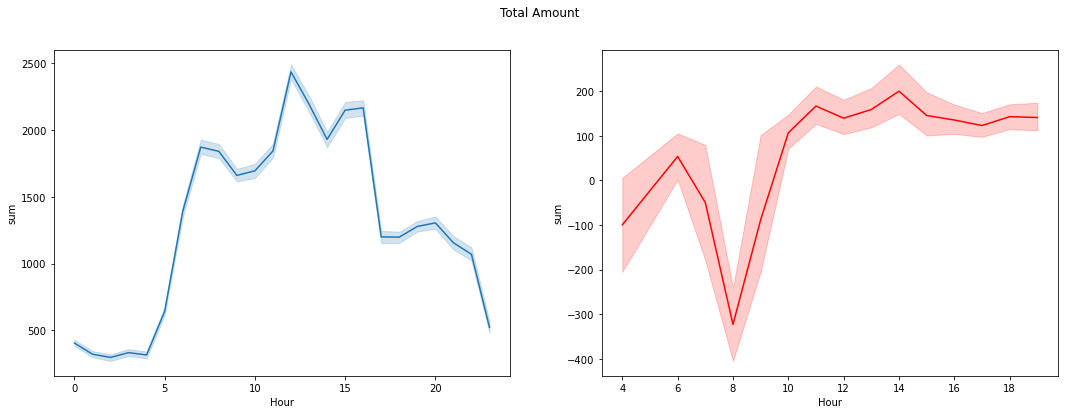

In [312]:
fig_amount_hourly, (ax1, ax2) = plt.subplots(ncols=2, figsize=(18,6))
s = sns.lineplot(ax = ax1, x="Hour", y="sum", data=temp.loc[temp.isFraud=='No'])
s = sns.lineplot(ax = ax2, x="Hour", y="sum", data=temp.loc[temp.isFraud=='Yes'], color="red")
plt.suptitle("Total Amount")
plt.show()

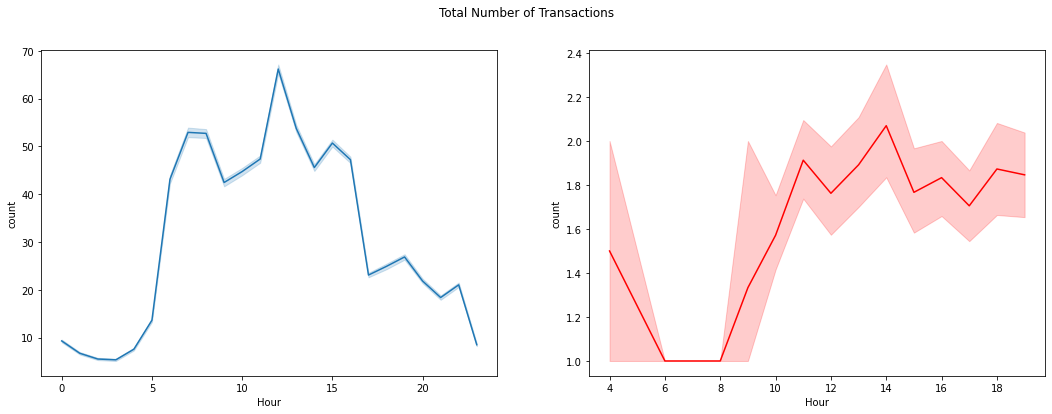

In [313]:
fig_number_hourly, (ax1, ax2) = plt.subplots(ncols=2, figsize=(18,6))
s = sns.lineplot(ax = ax1, x="Hour", y="count", data=temp.loc[temp.isFraud=='No'])
s = sns.lineplot(ax = ax2, x="Hour", y="count", data=temp.loc[temp.isFraud=='Yes'], color="red")
plt.suptitle("Total Number of Transactions")
plt.show()

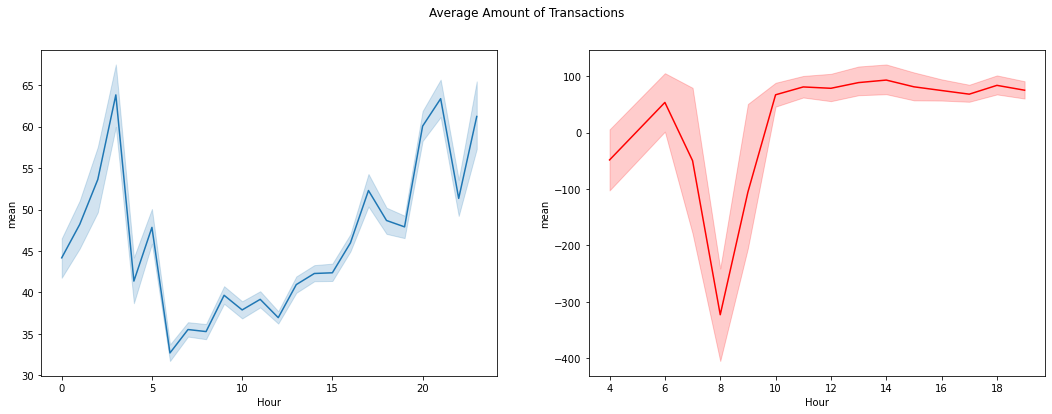

In [314]:
fig_mean_hourly, (ax1, ax2) = plt.subplots(ncols=2, figsize=(18,6))
s = sns.lineplot(ax = ax1, x="Hour", y="mean", data=temp.loc[temp.isFraud=='No'])
s = sns.lineplot(ax = ax2, x="Hour", y="mean", data=temp.loc[temp.isFraud=='Yes'], color="red")
plt.suptitle("Average Amount of Transactions")
plt.show()

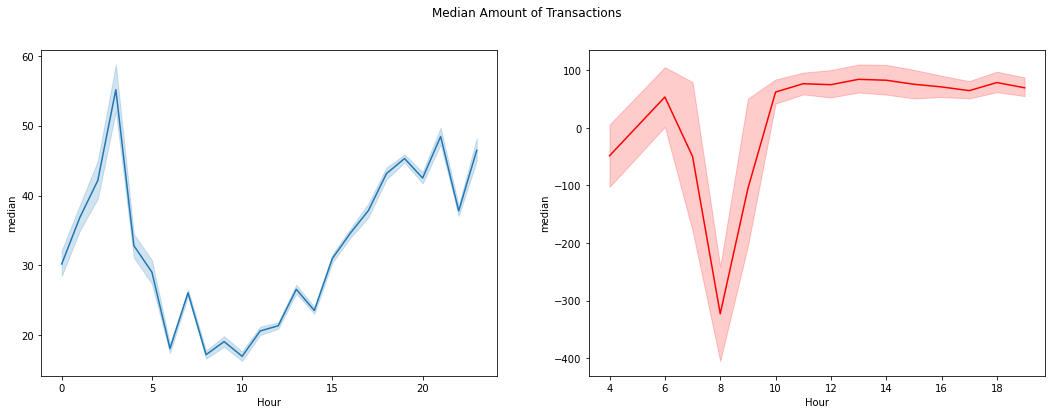

In [315]:
fig_median_hourly, (ax1, ax2) = plt.subplots(ncols=2, figsize=(18,6))
s = sns.lineplot(ax = ax1, x="Hour", y="median", data=temp.loc[temp.isFraud=='No'])
s = sns.lineplot(ax = ax2, x="Hour", y="median", data=temp.loc[temp.isFraud=='Yes'], color="red")
plt.suptitle("Median Amount of Transactions")
plt.show()

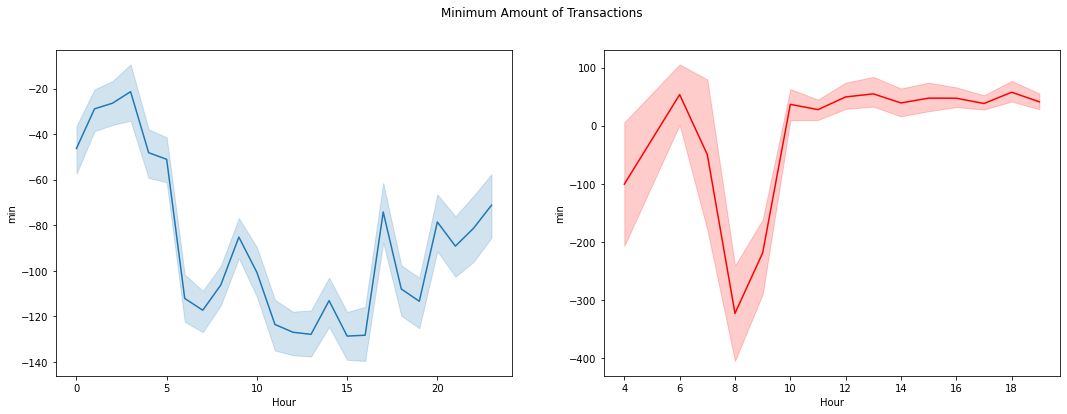

In [316]:
fig_min_hourly, (ax1, ax2) = plt.subplots(ncols=2, figsize=(18,6))
s = sns.lineplot(ax = ax1, x="Hour", y="min", data=temp.loc[temp.isFraud=='No'])
s = sns.lineplot(ax = ax2, x="Hour", y="min", data=temp.loc[temp.isFraud=='Yes'], color="red")
plt.suptitle("Minimum Amount of Transactions")
plt.show()

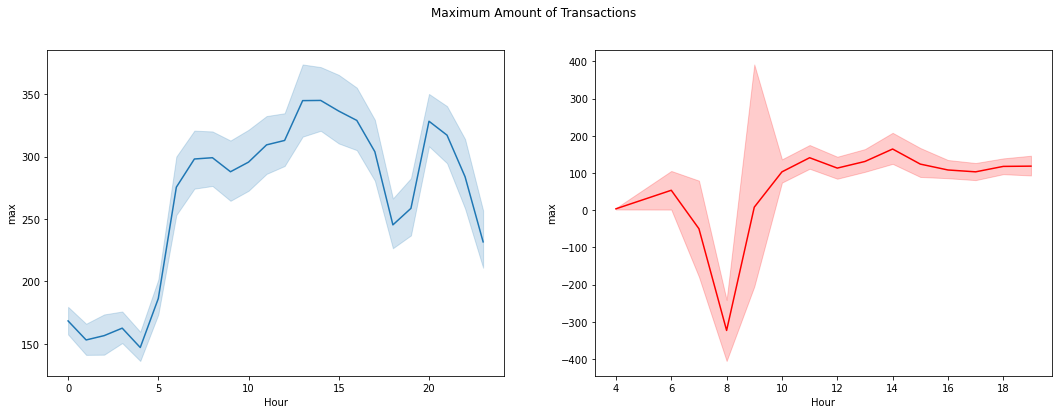

In [317]:
fig_max_hourly, (ax1, ax2) = plt.subplots(ncols=2, figsize=(18,6))
s = sns.lineplot(ax = ax1, x="Hour", y="max", data=temp.loc[temp.isFraud=='No'])
s = sns.lineplot(ax = ax2, x="Hour", y="max", data=temp.loc[temp.isFraud=='Yes'], color="red")
plt.suptitle("Maximum Amount of Transactions")
plt.show()

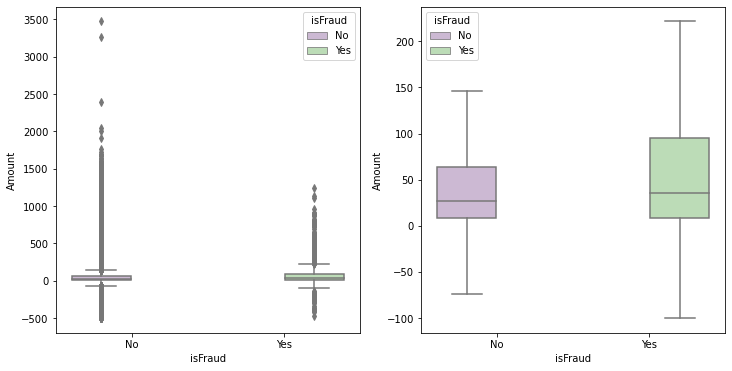

In [318]:
fig_box, (ax1, ax2) = plt.subplots(ncols=2, figsize=(12,6))
s = sns.boxplot(ax = ax1, x="isFraud", y="Amount", hue="isFraud",data=cct, palette="PRGn",showfliers=True)
s = sns.boxplot(ax = ax2, x="isFraud", y="Amount", hue="isFraud",data=cct, palette="PRGn",showfliers=False)
plt.show()

## Analytical of Day features

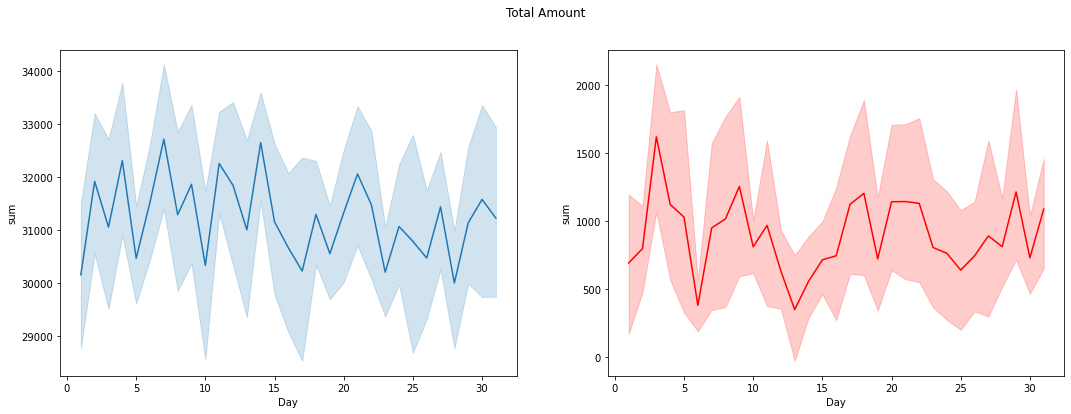

In [319]:
#creating the dataframe for the statistical plots
daily= cct.groupby(['Month','Day','isFraud'])['Amount'].aggregate(['min', 'max', 'count', 'sum', 'mean', 'median', 'var']).reset_index()
#plotting the fraud and non-fradulent transactions against the total amount in the data set
fig_amount_daily, (ax1, ax2) = plt.subplots(ncols=2, figsize=(18,6))
s = sns.lineplot(ax = ax1, x="Day", y="sum", data=daily.loc[daily.isFraud=='No'])
s = sns.lineplot(ax = ax2, x="Day", y="sum", data=daily.loc[daily.isFraud=='Yes'], color="red")
plt.suptitle("Total Amount")
plt.show()

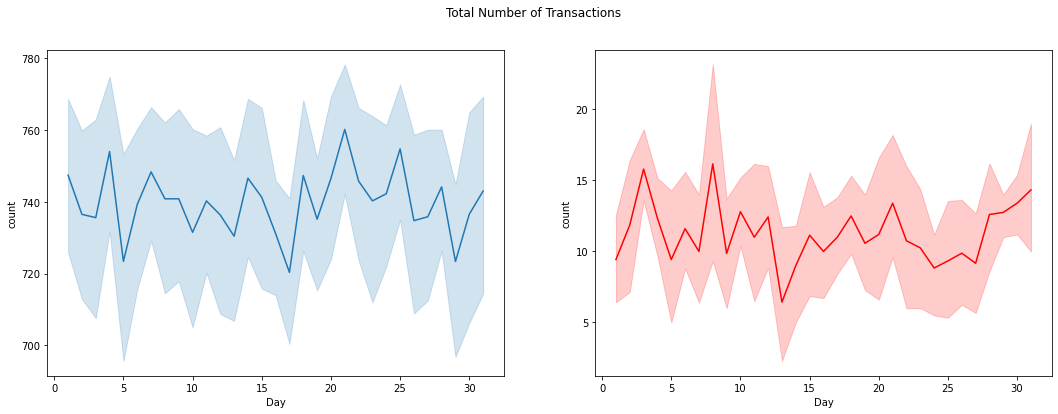

In [320]:
#plotting the fraud and non-fradulent transactions against the total number of transactions in the data set
fig_number_daily, (ax1, ax2) = plt.subplots(ncols=2, figsize=(18,6))
s = sns.lineplot(ax = ax1, x="Day", y="count", data=daily.loc[daily.isFraud=='No'])
s = sns.lineplot(ax = ax2, x="Day", y="count", data=daily.loc[daily.isFraud=='Yes'], color="red")
plt.suptitle("Total Number of Transactions")
plt.show()

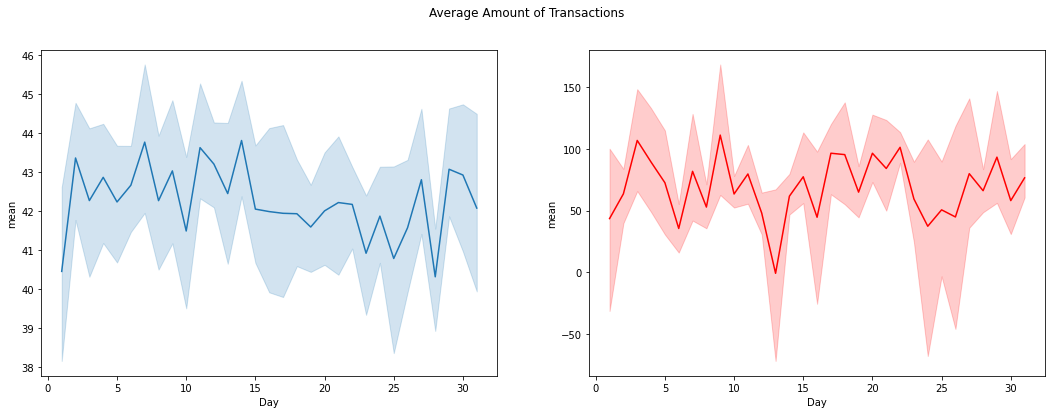

In [321]:
#plotting the fraud and non-fradulent transactions against the average amount of transactions per day in the data set
fig_mean_daily, (ax1, ax2) = plt.subplots(ncols=2, figsize=(18,6))
s = sns.lineplot(ax = ax1, x="Day", y="mean", data=daily.loc[daily.isFraud=='No'])
s = sns.lineplot(ax = ax2, x="Day", y="mean", data=daily.loc[daily.isFraud=='Yes'], color="red")
plt.suptitle("Average Amount of Transactions")
plt.show()

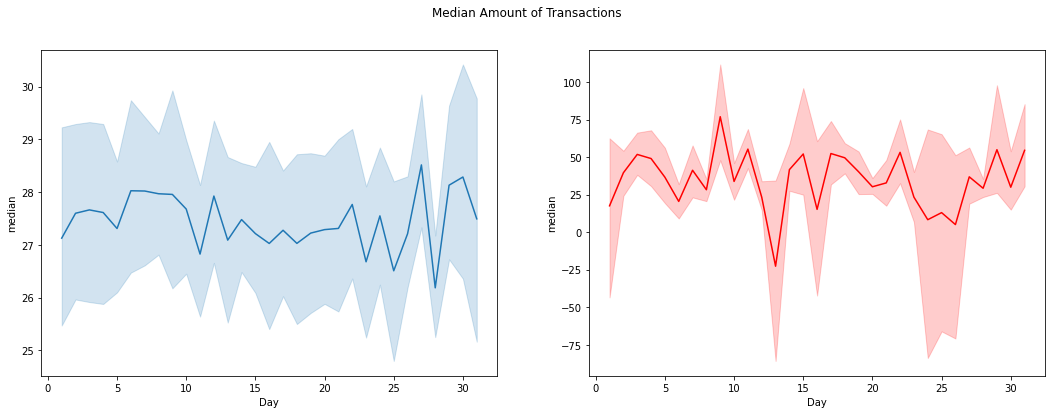

In [322]:
#plotting the fraud and non-fradulent transactions against the median amount of transactions in the data set
fig_median_daily, (ax1, ax2) = plt.subplots(ncols=2, figsize=(18,6))
s = sns.lineplot(ax = ax1, x="Day", y="median", data=daily.loc[daily.isFraud=='No'])
s = sns.lineplot(ax = ax2, x="Day", y="median", data=daily.loc[daily.isFraud=='Yes'], color="red")
plt.suptitle("Median Amount of Transactions")
plt.show()

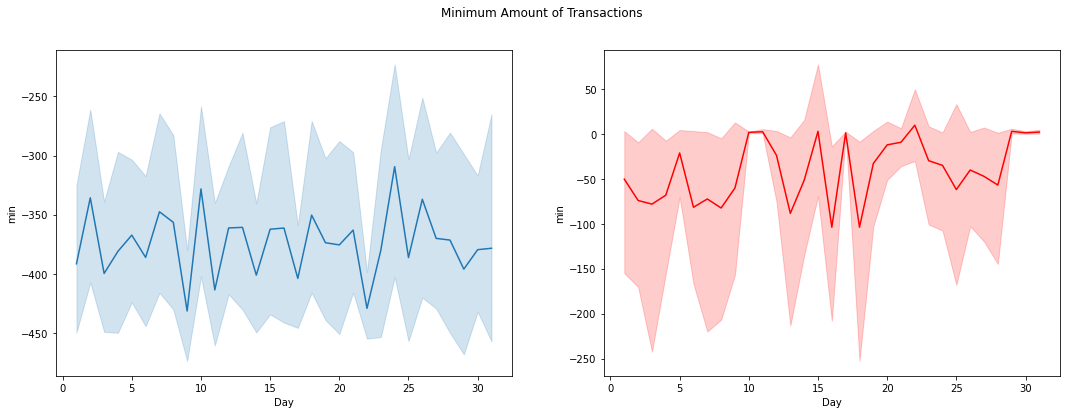

In [323]:
#plotting the fraud and non-fradulent transactions against the minimum amount of transactions in the data set
fig_min_daily, (ax1, ax2) = plt.subplots(ncols=2, figsize=(18,6))
s = sns.lineplot(ax = ax1, x="Day", y="min", data=daily.loc[daily.isFraud=='No'])
s = sns.lineplot(ax = ax2, x="Day", y="min", data=daily.loc[daily.isFraud=='Yes'], color="red")
plt.suptitle("Minimum Amount of Transactions")
plt.show()

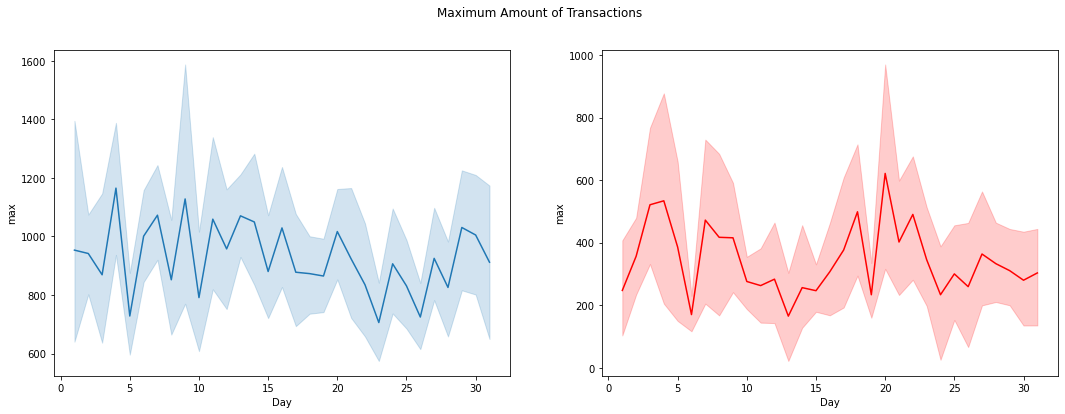

In [324]:
#plotting the fraud and non-fradulent transactions against the maximum amount in transactions in the data set
fig_max_daily, (ax1, ax2) = plt.subplots(ncols=2, figsize=(18,6))
s = sns.lineplot(ax = ax1, x="Day", y="max", data=daily.loc[daily.isFraud=='No'])
s = sns.lineplot(ax = ax2, x="Day", y="max", data=daily.loc[daily.isFraud=='Yes'], color="red")
plt.suptitle("Maximum Amount of Transactions")
plt.show()

## Dashboarding time....

Tabs
    [0] Column
        [0] Markdown(str)
        [1] Matplotlib(Figure)
        [2] Matplotlib(Figure)
        [3] Matplotlib(Figure)
        [4] Matplotlib(Figure)
        [5] Matplotlib(Figure)
        [6] Matplotlib(Figure)
    [1] Column
        [0] Markdown(str)
        [1] Matplotlib(Figure)
        [2] Matplotlib(Figure)
        [3] Matplotlib(Figure)
        [4] Matplotlib(Figure)
        [5] Matplotlib(Figure)
        [6] Matplotlib(Figure)
    [2] Row
        [0] Matplotlib(Figure)
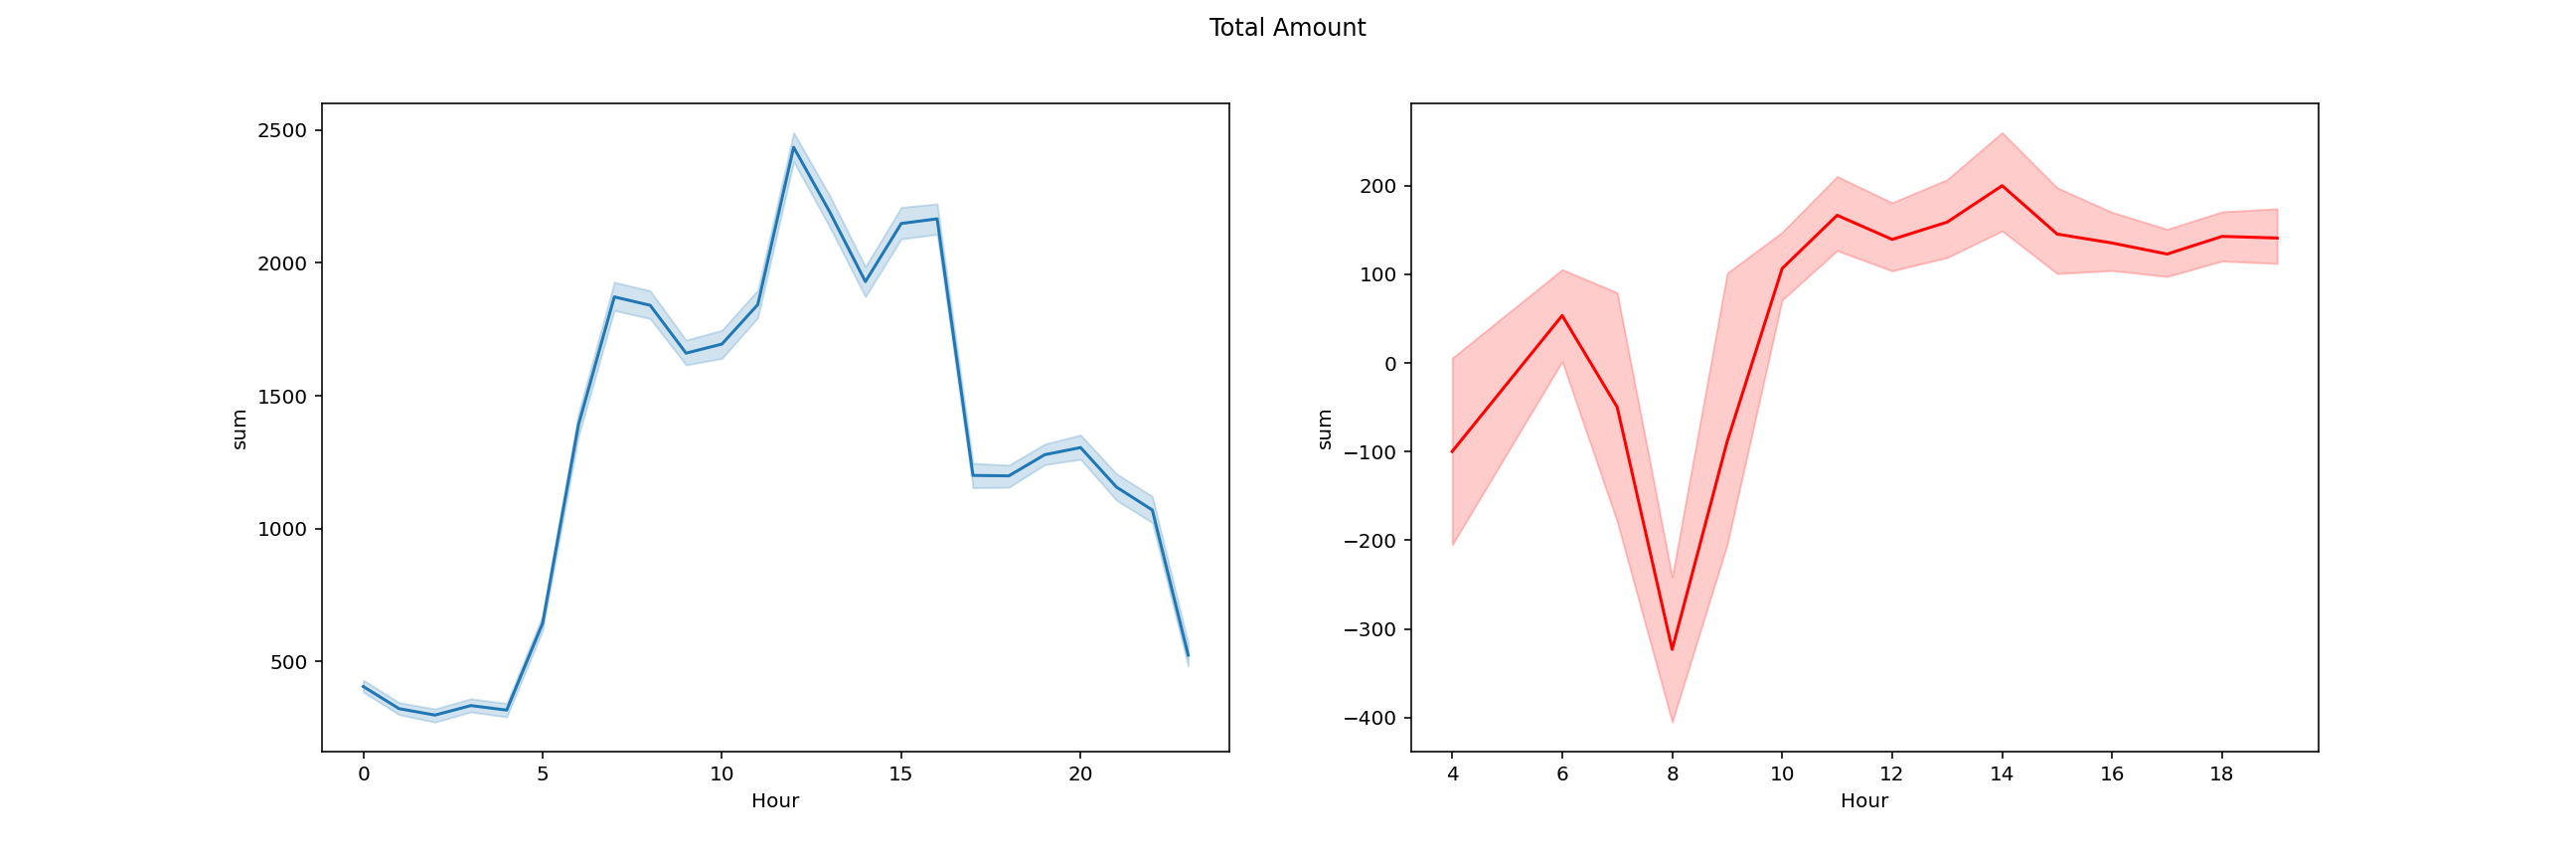
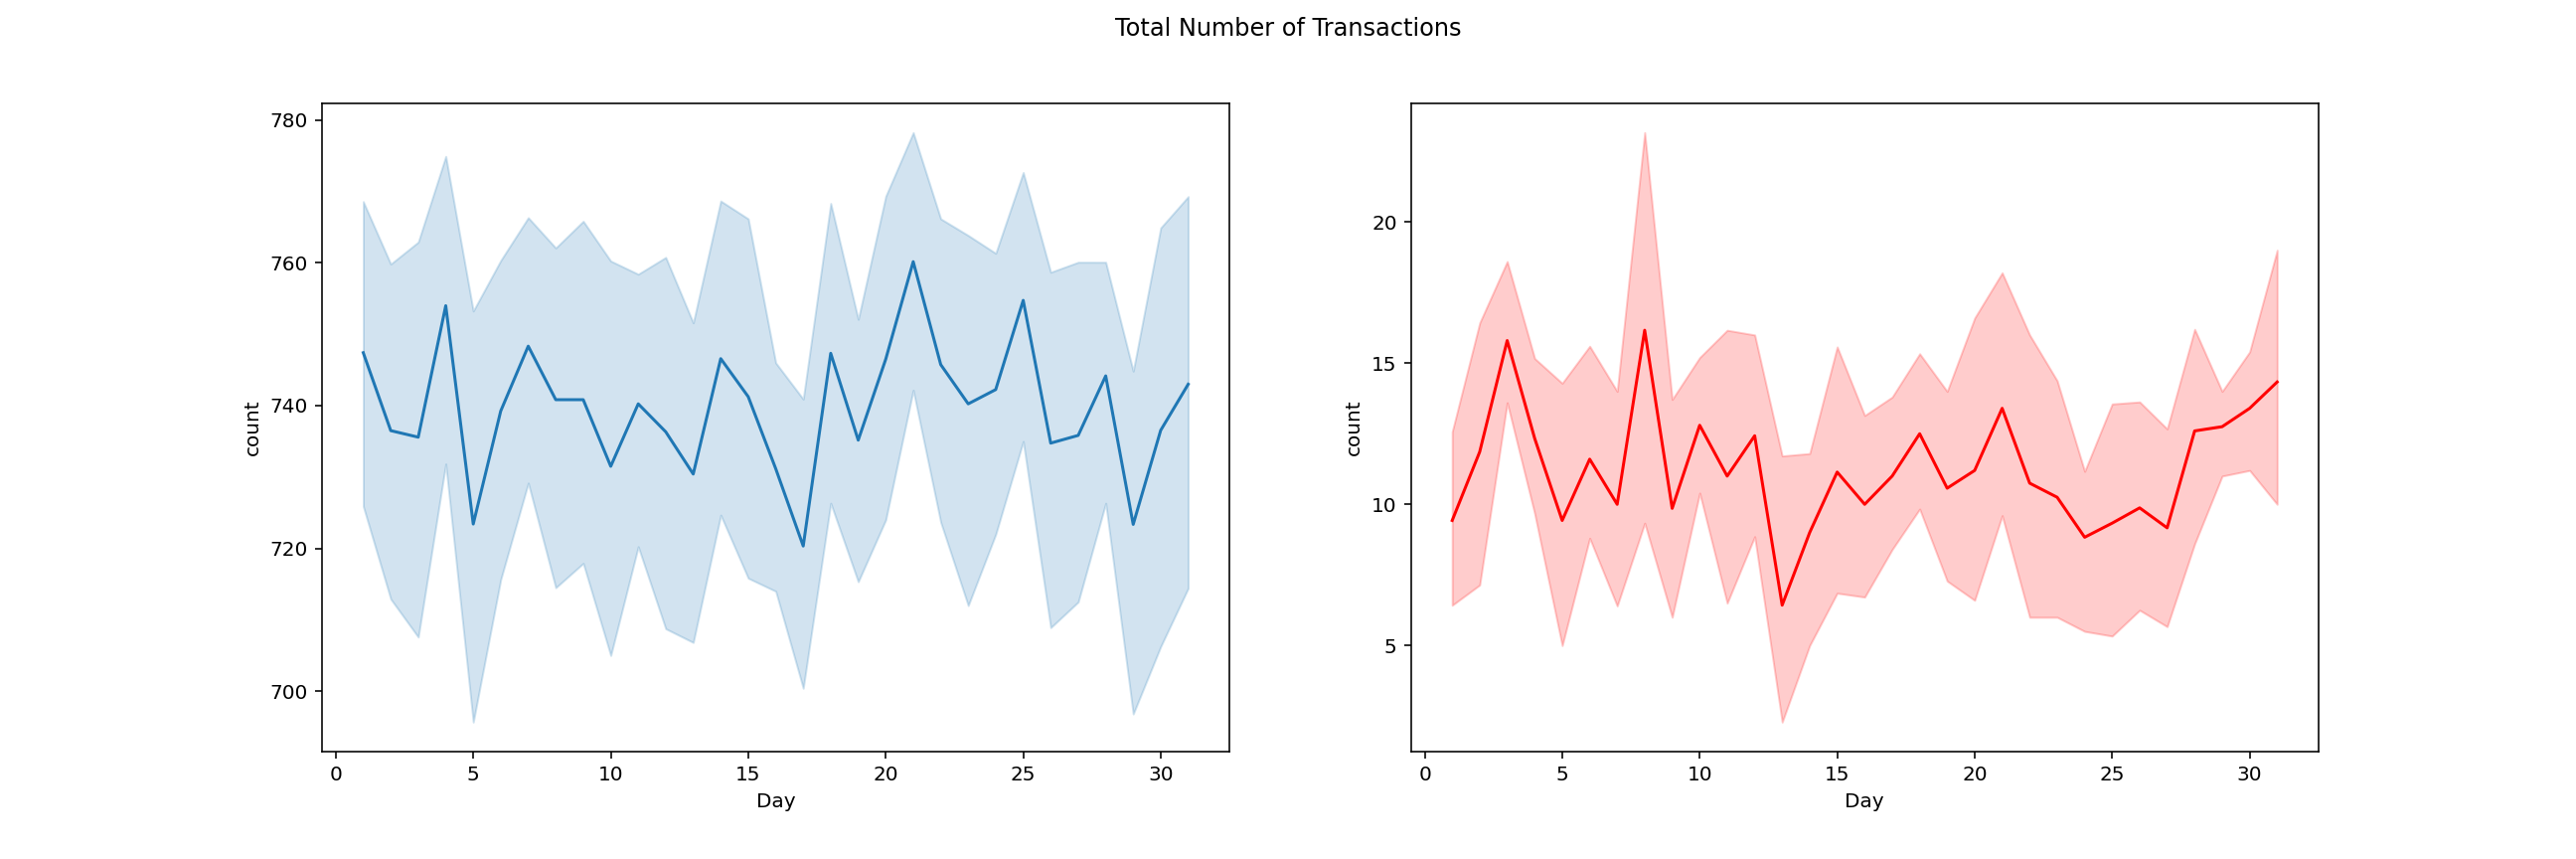
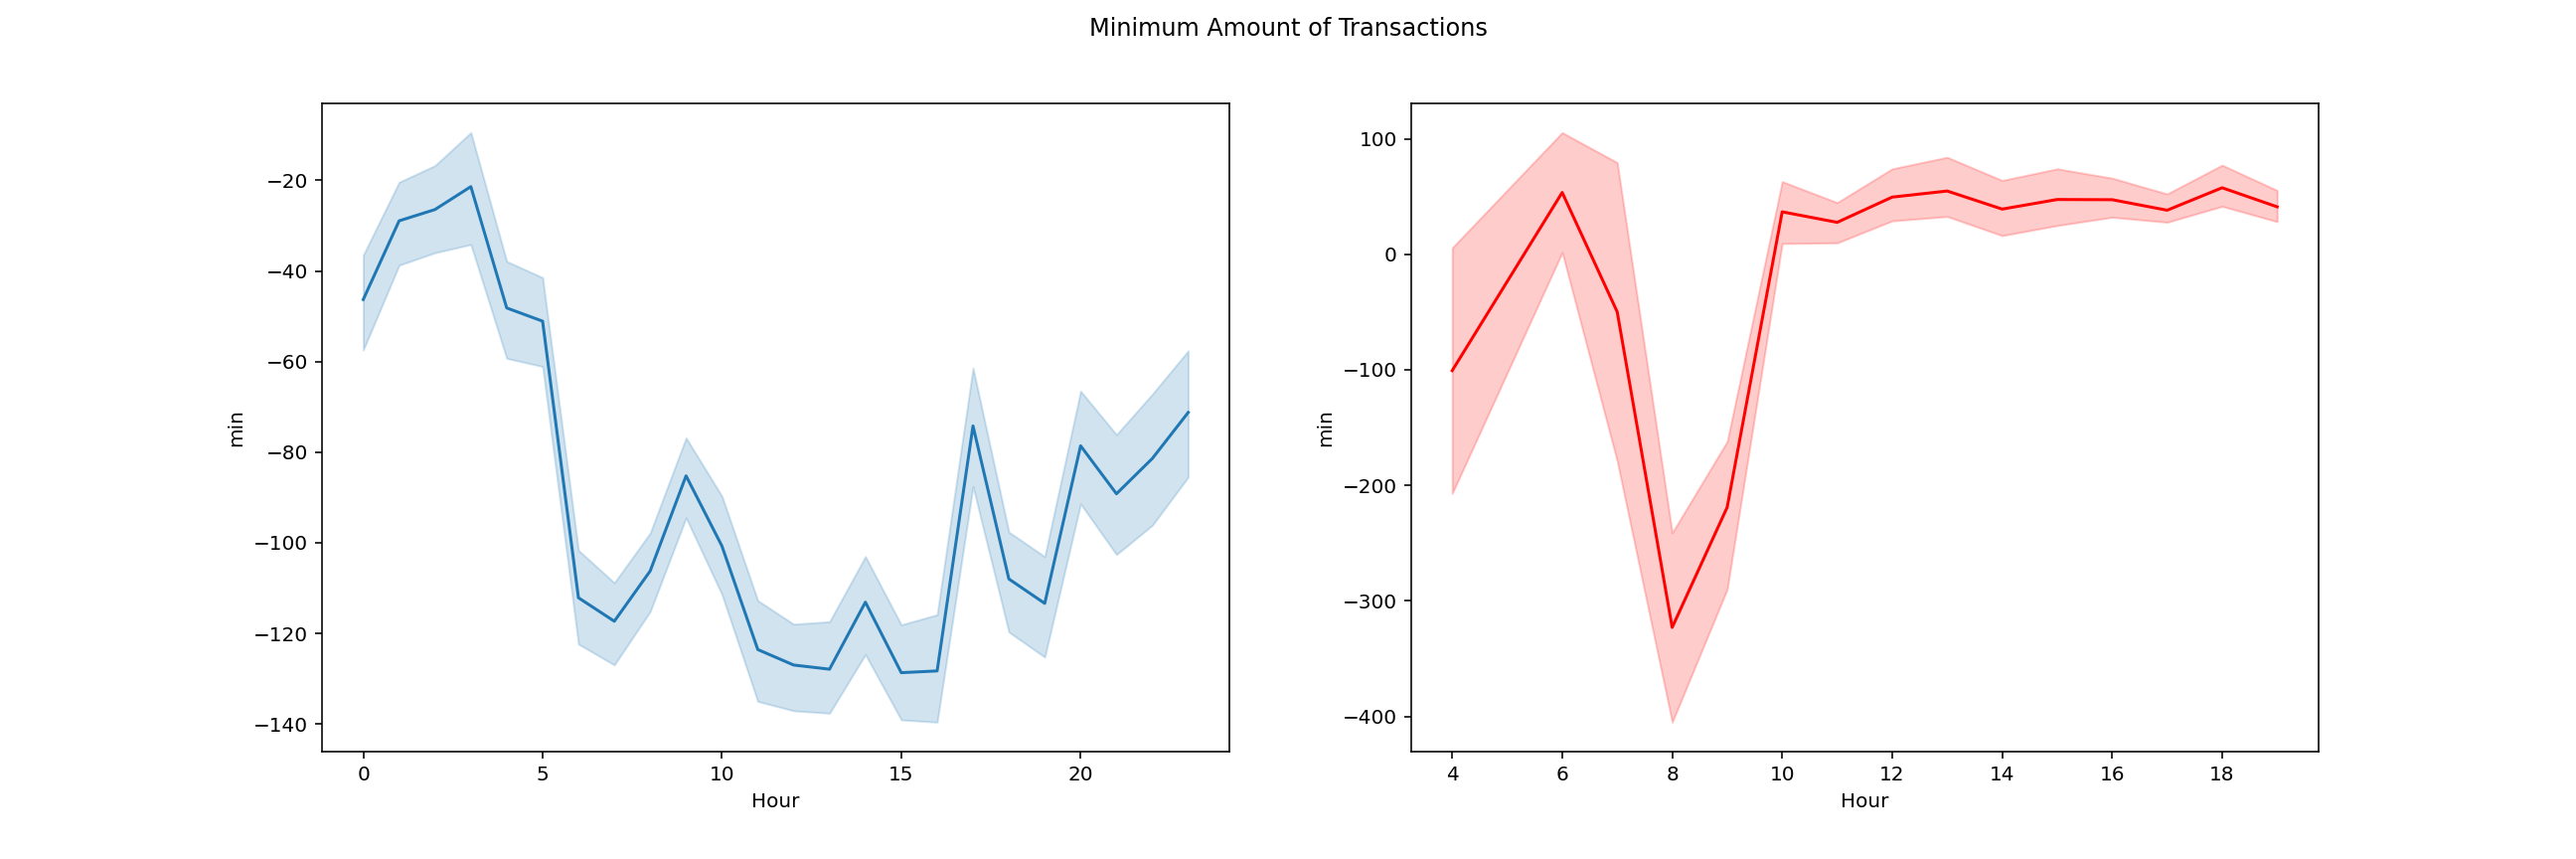
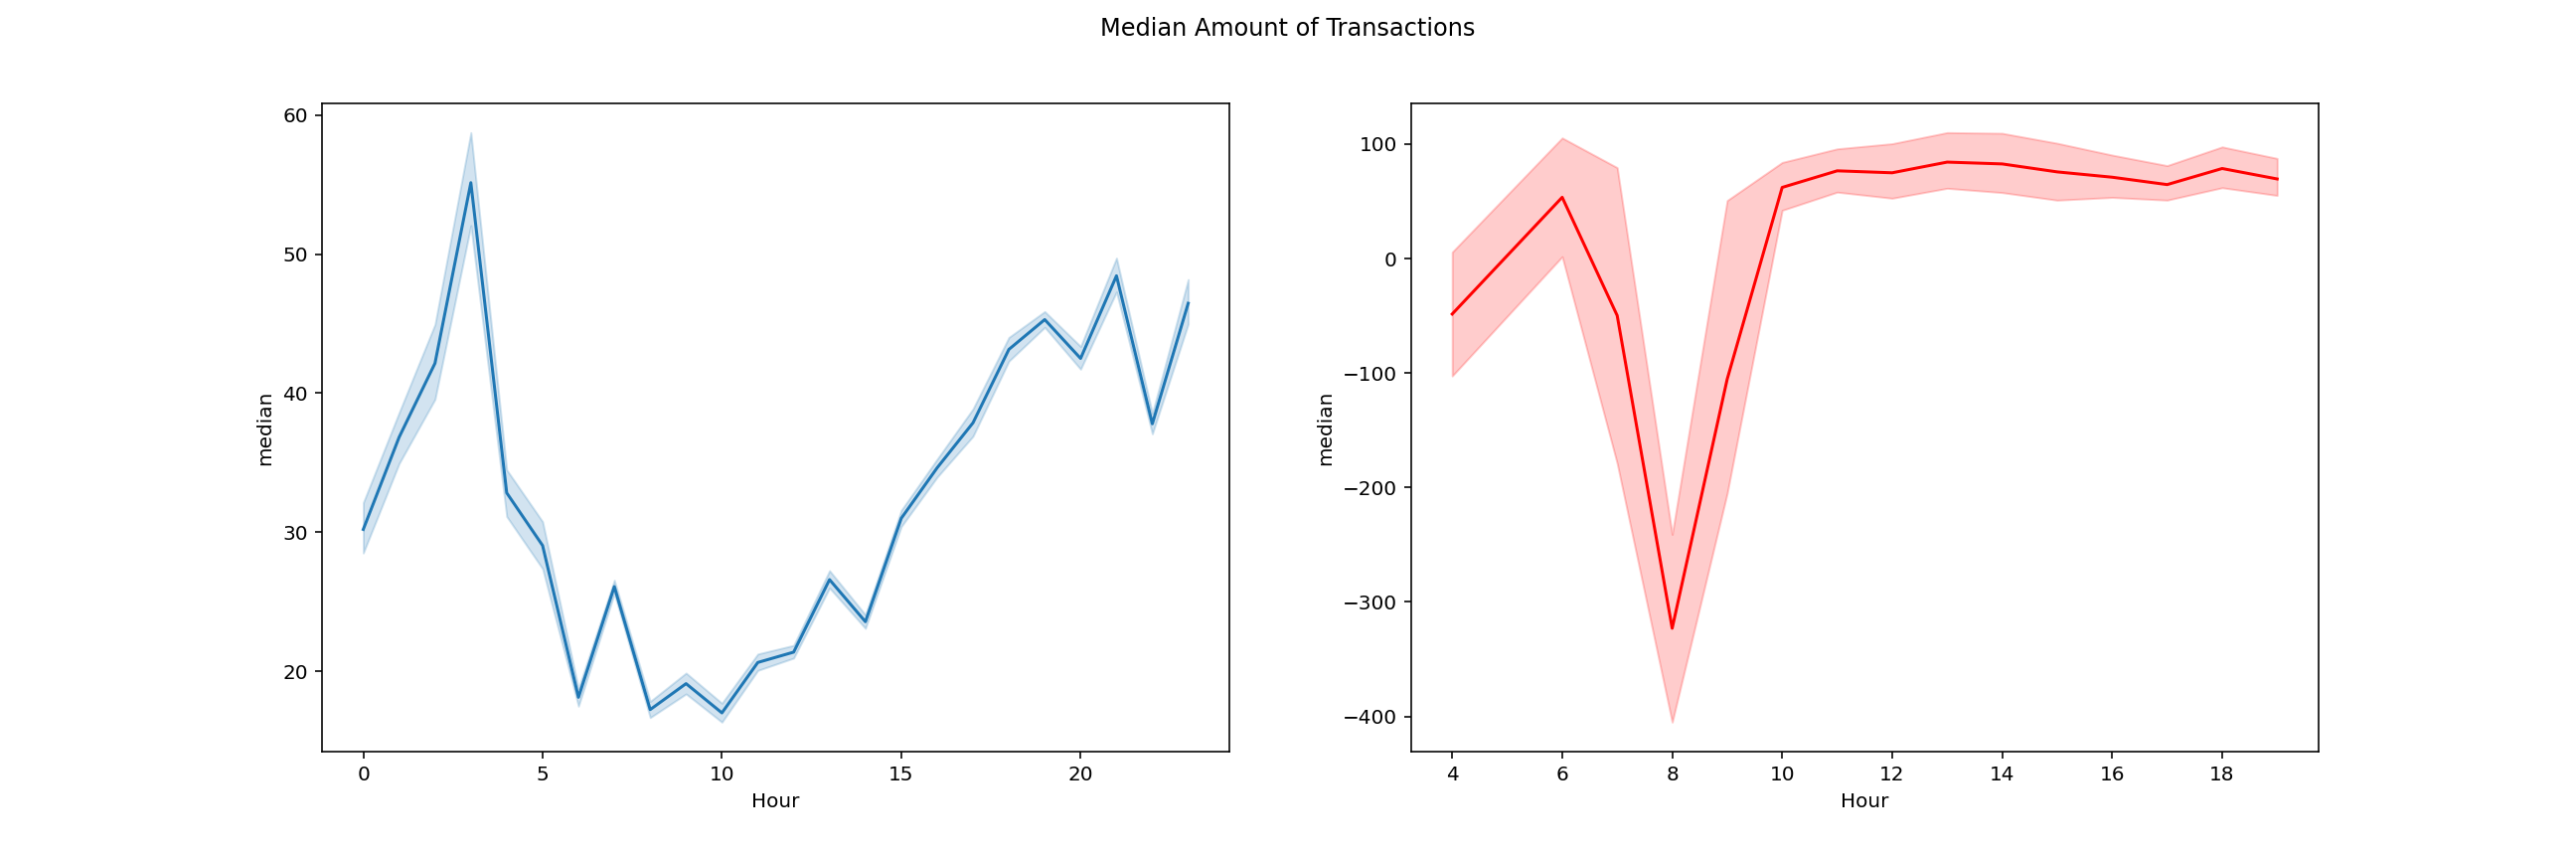
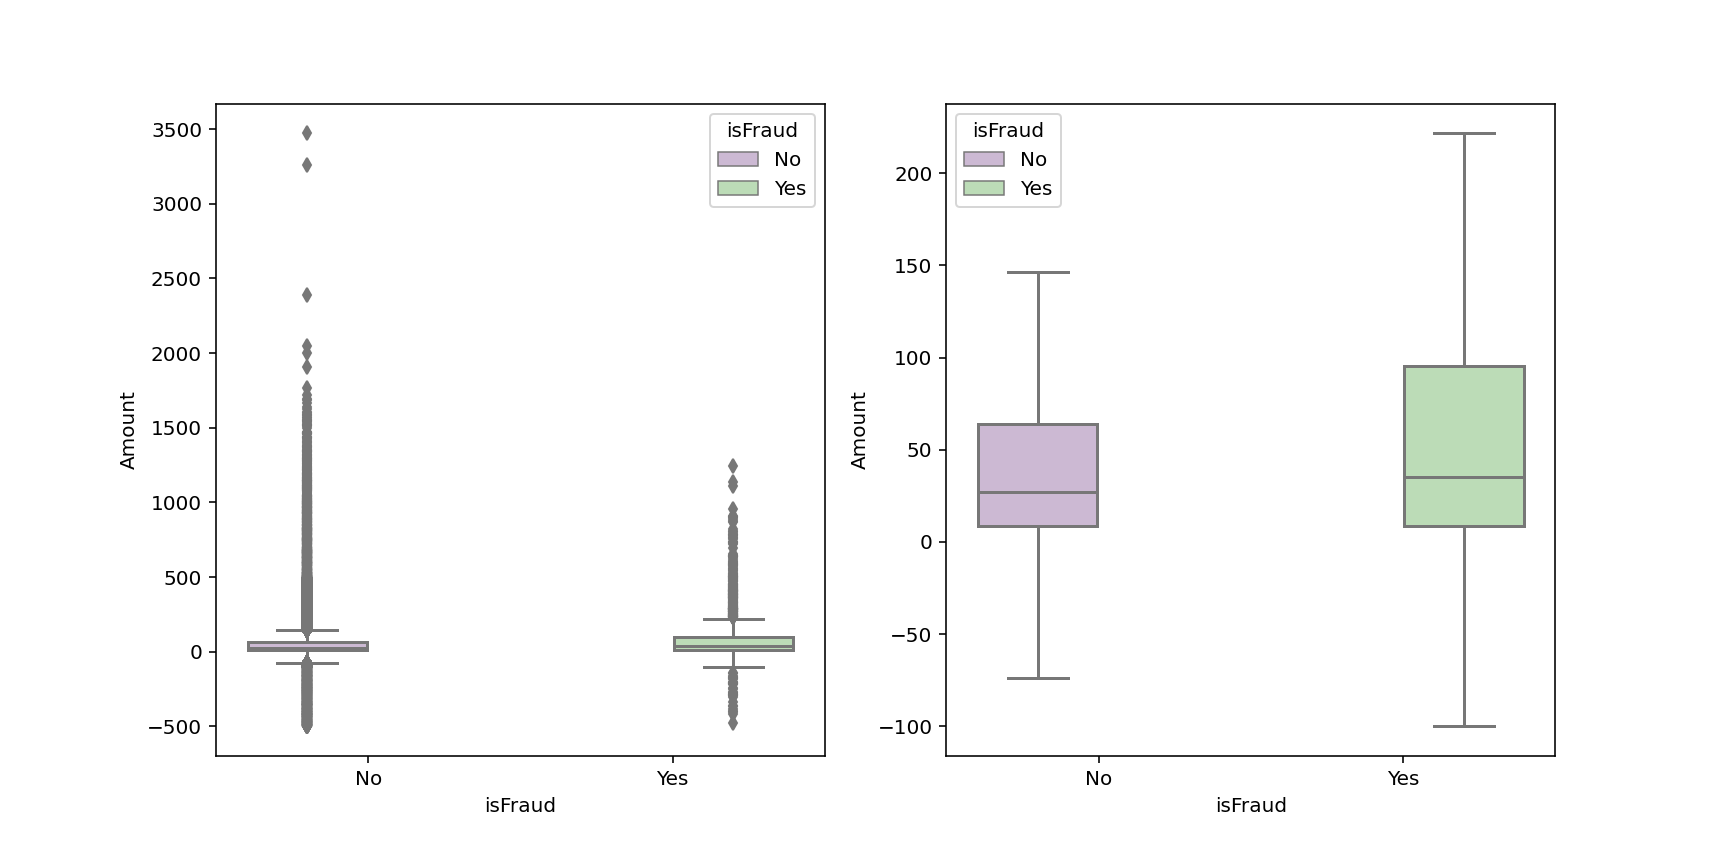
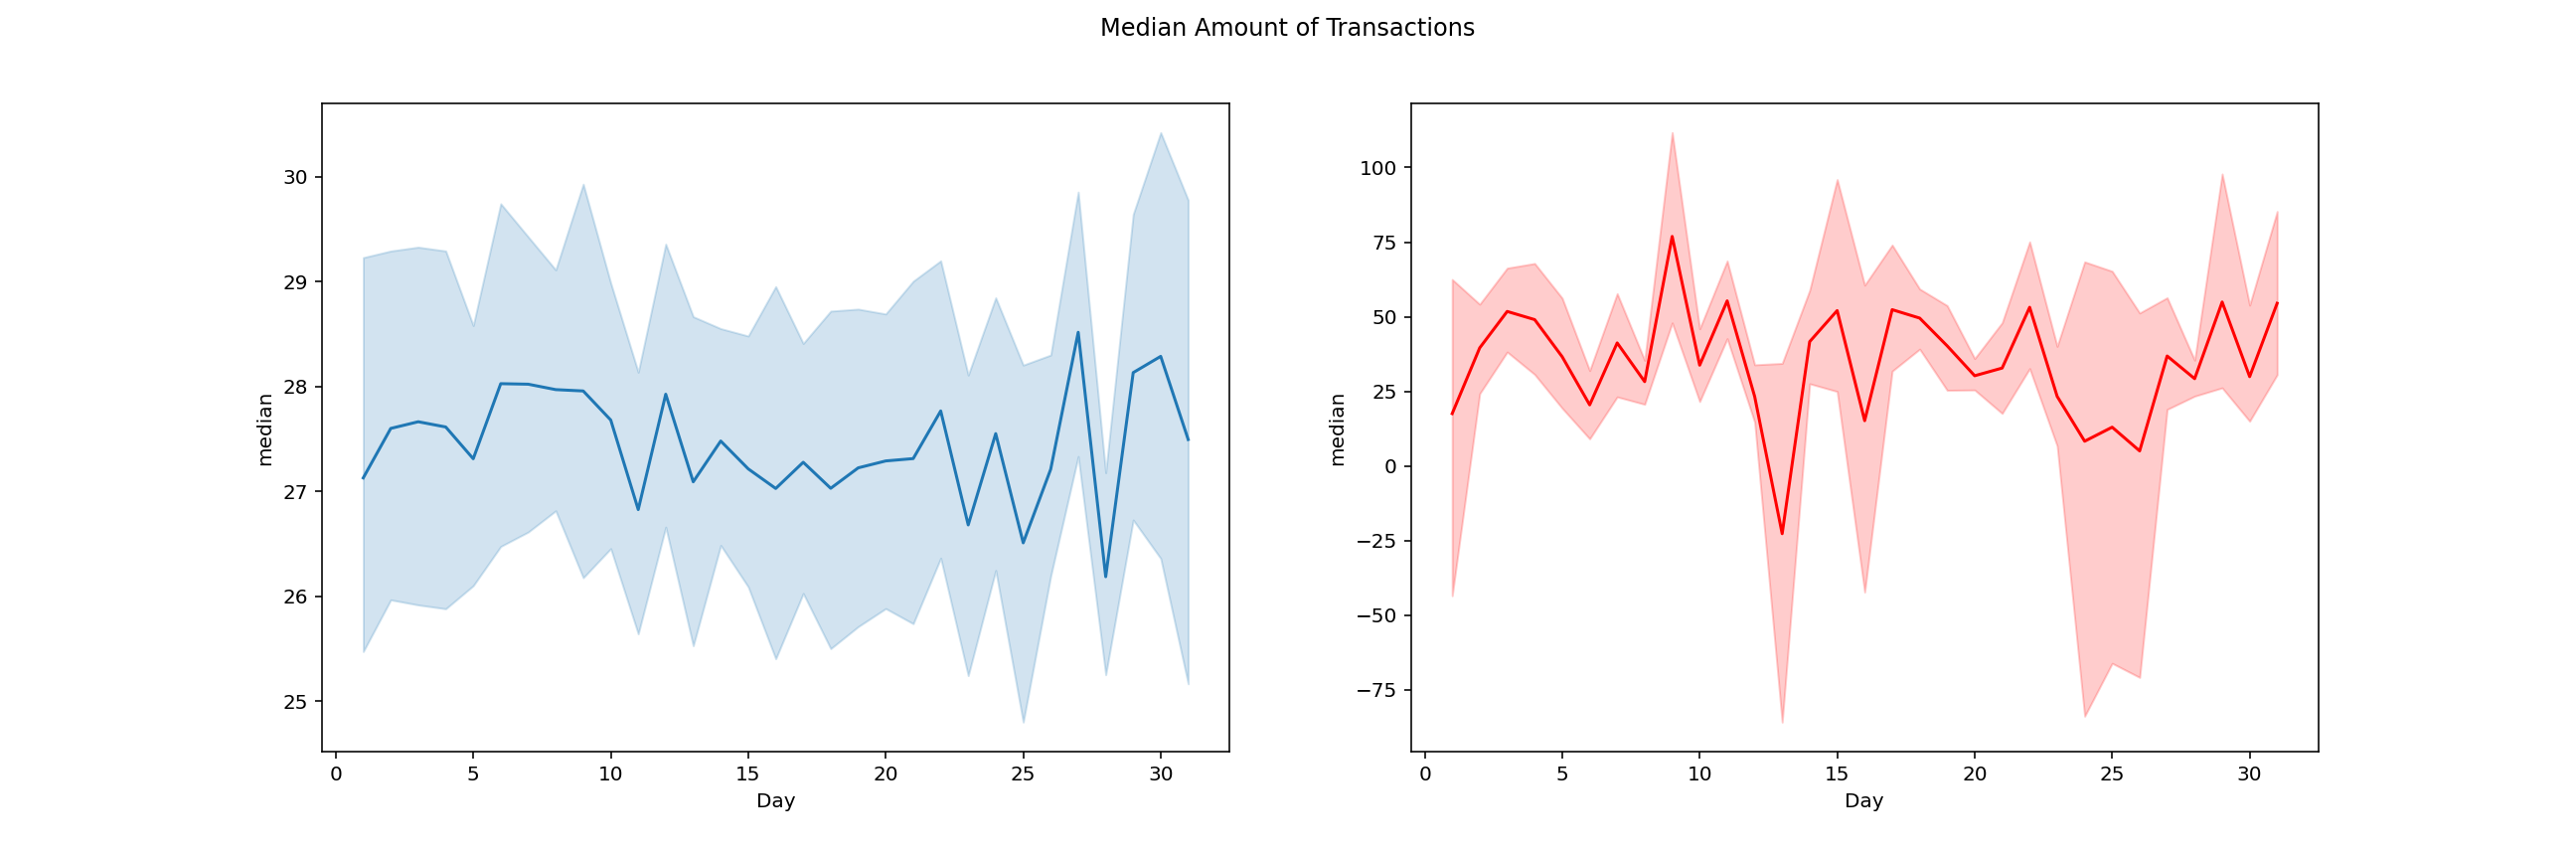
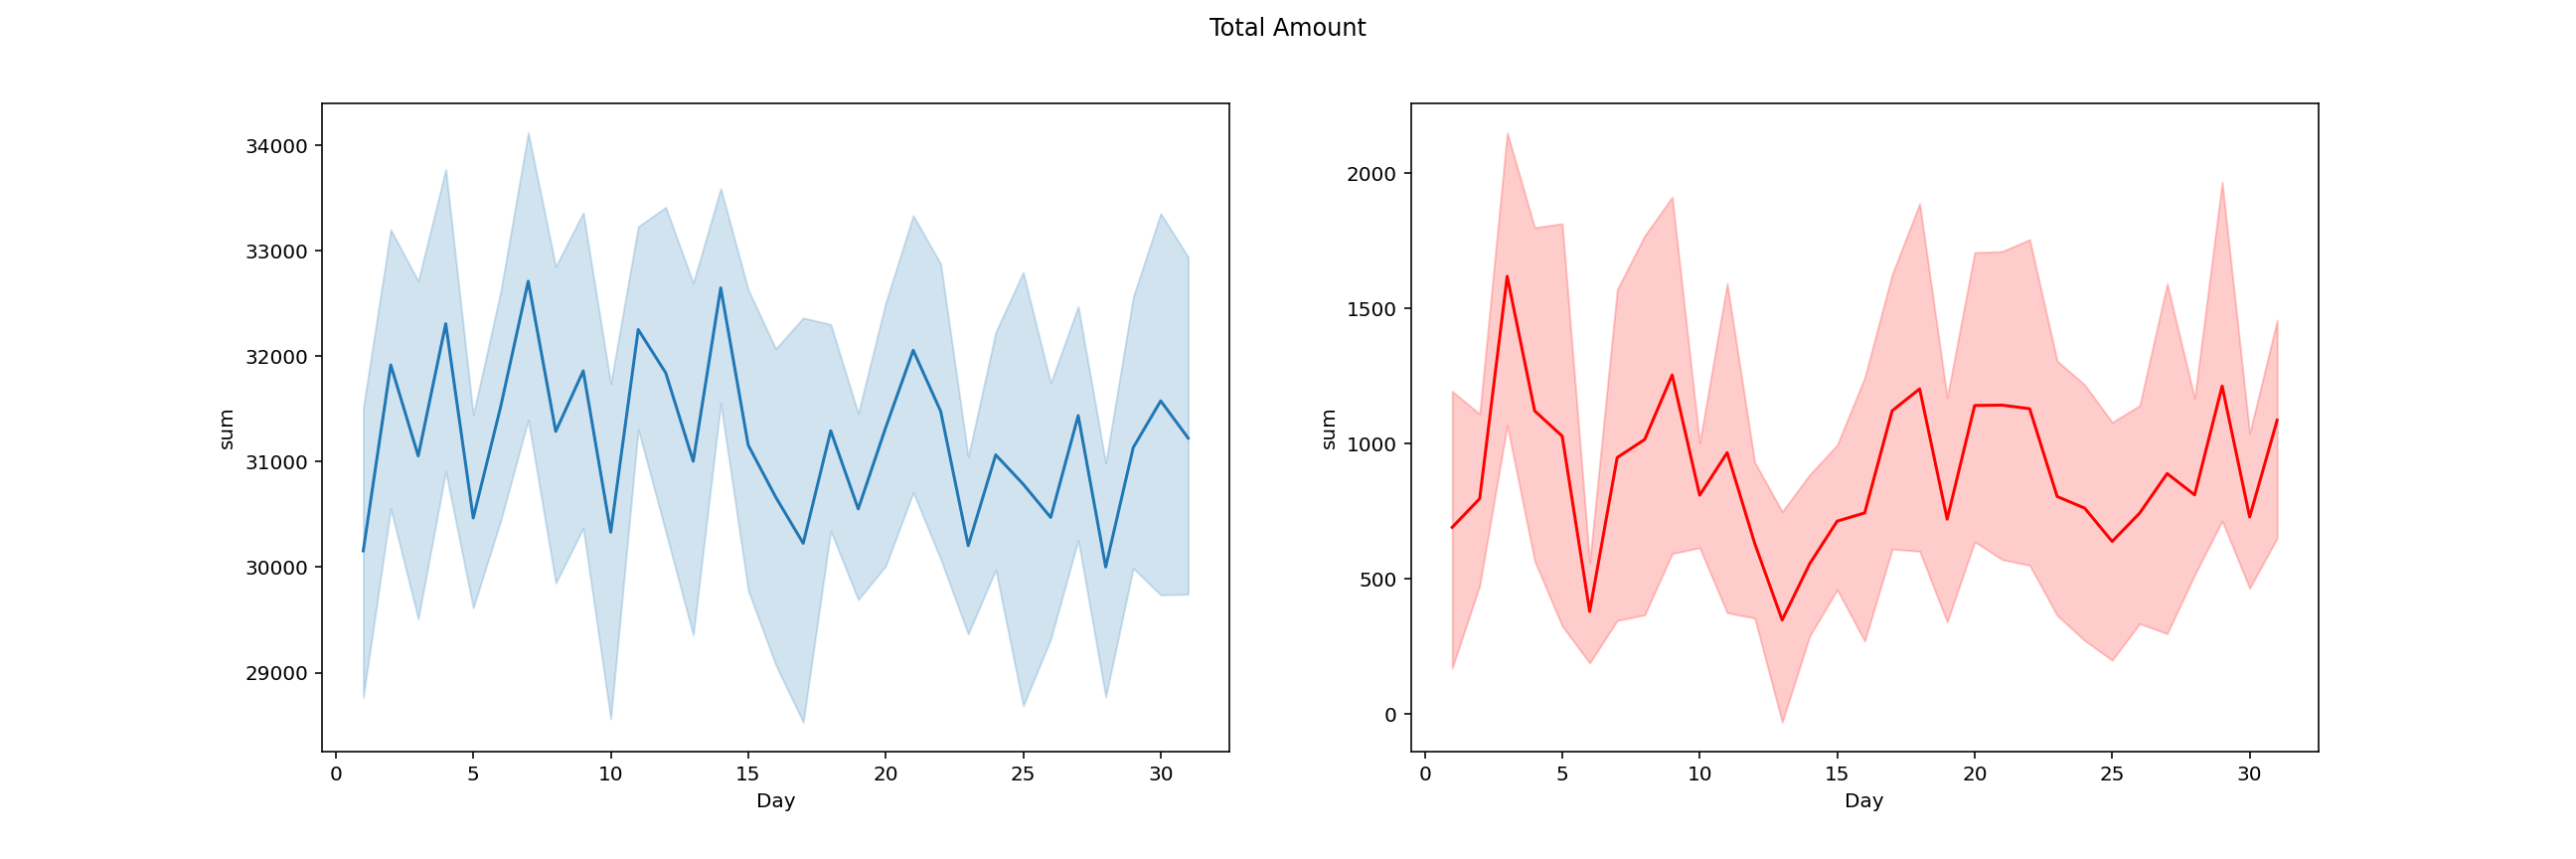
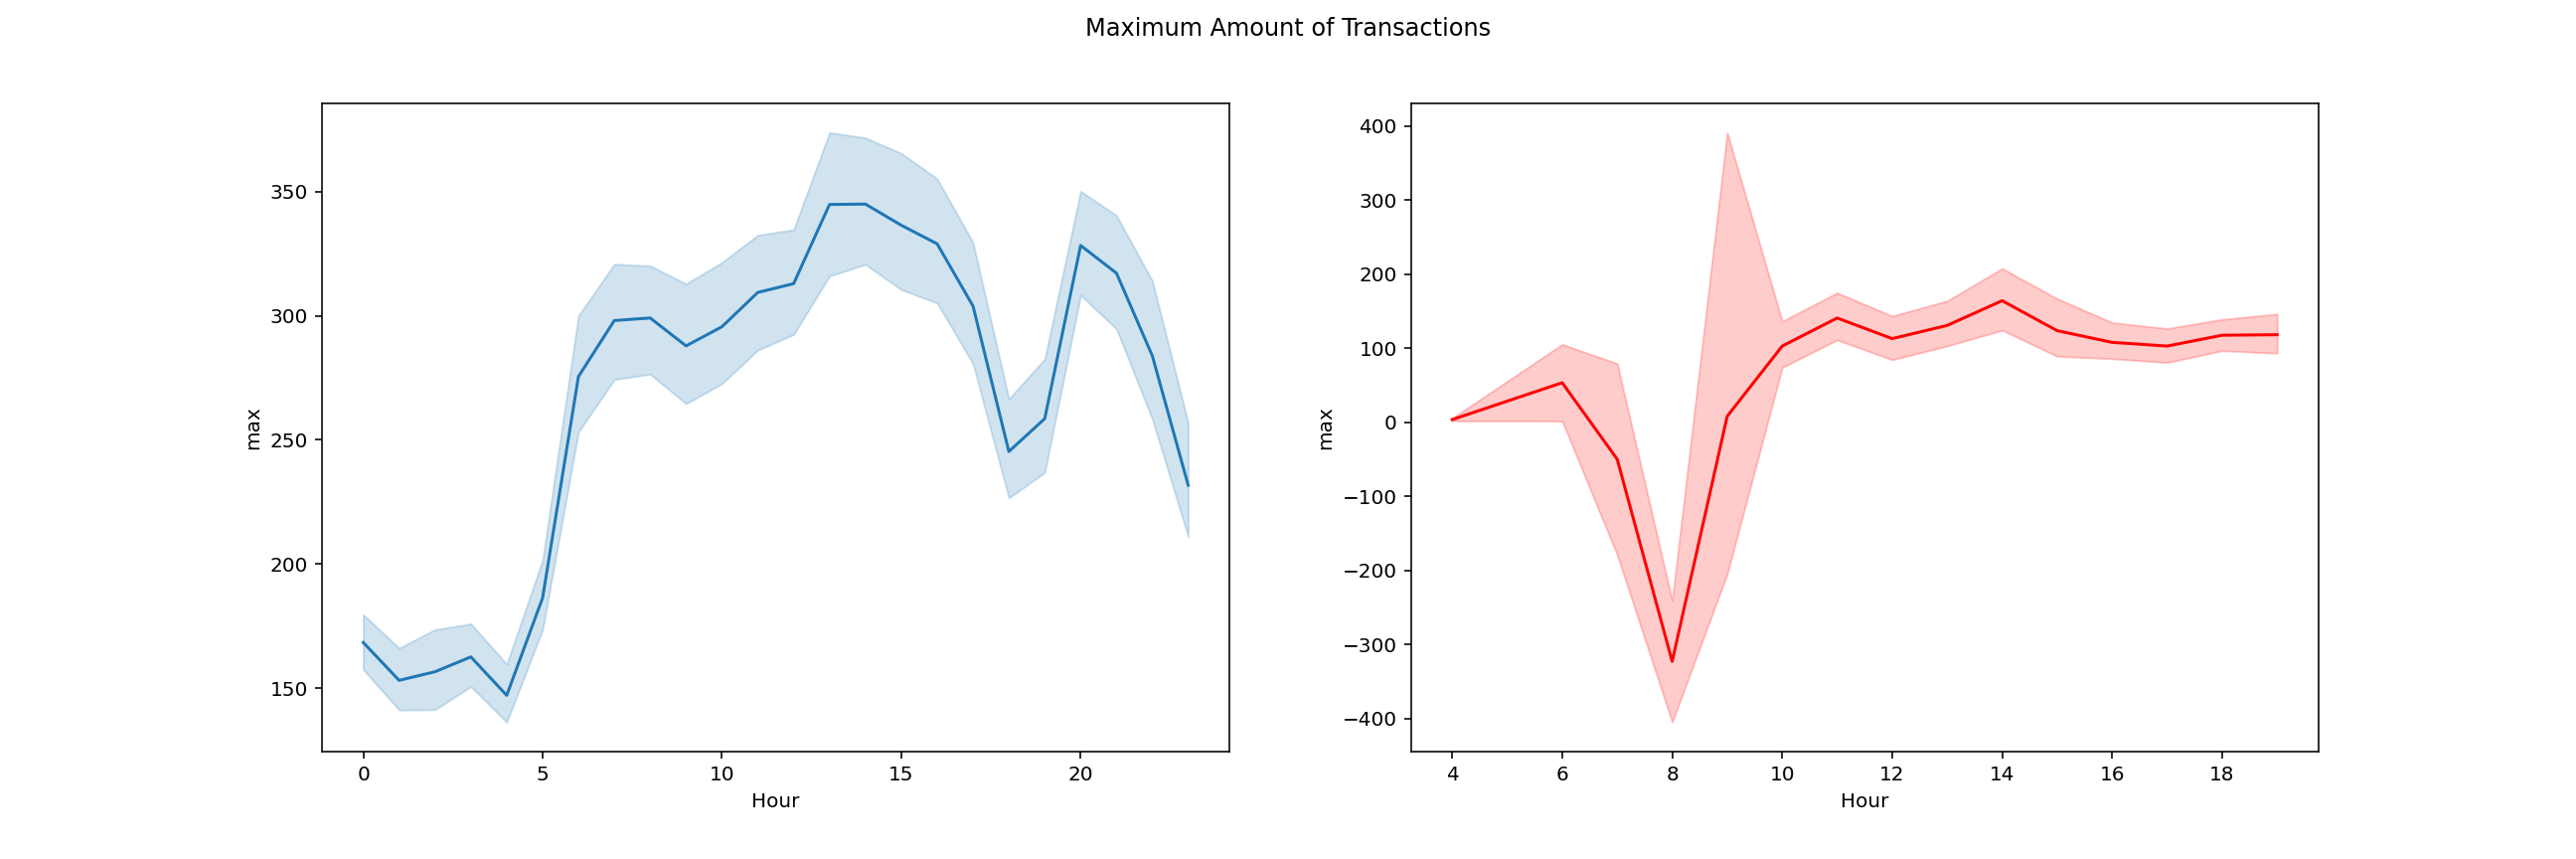
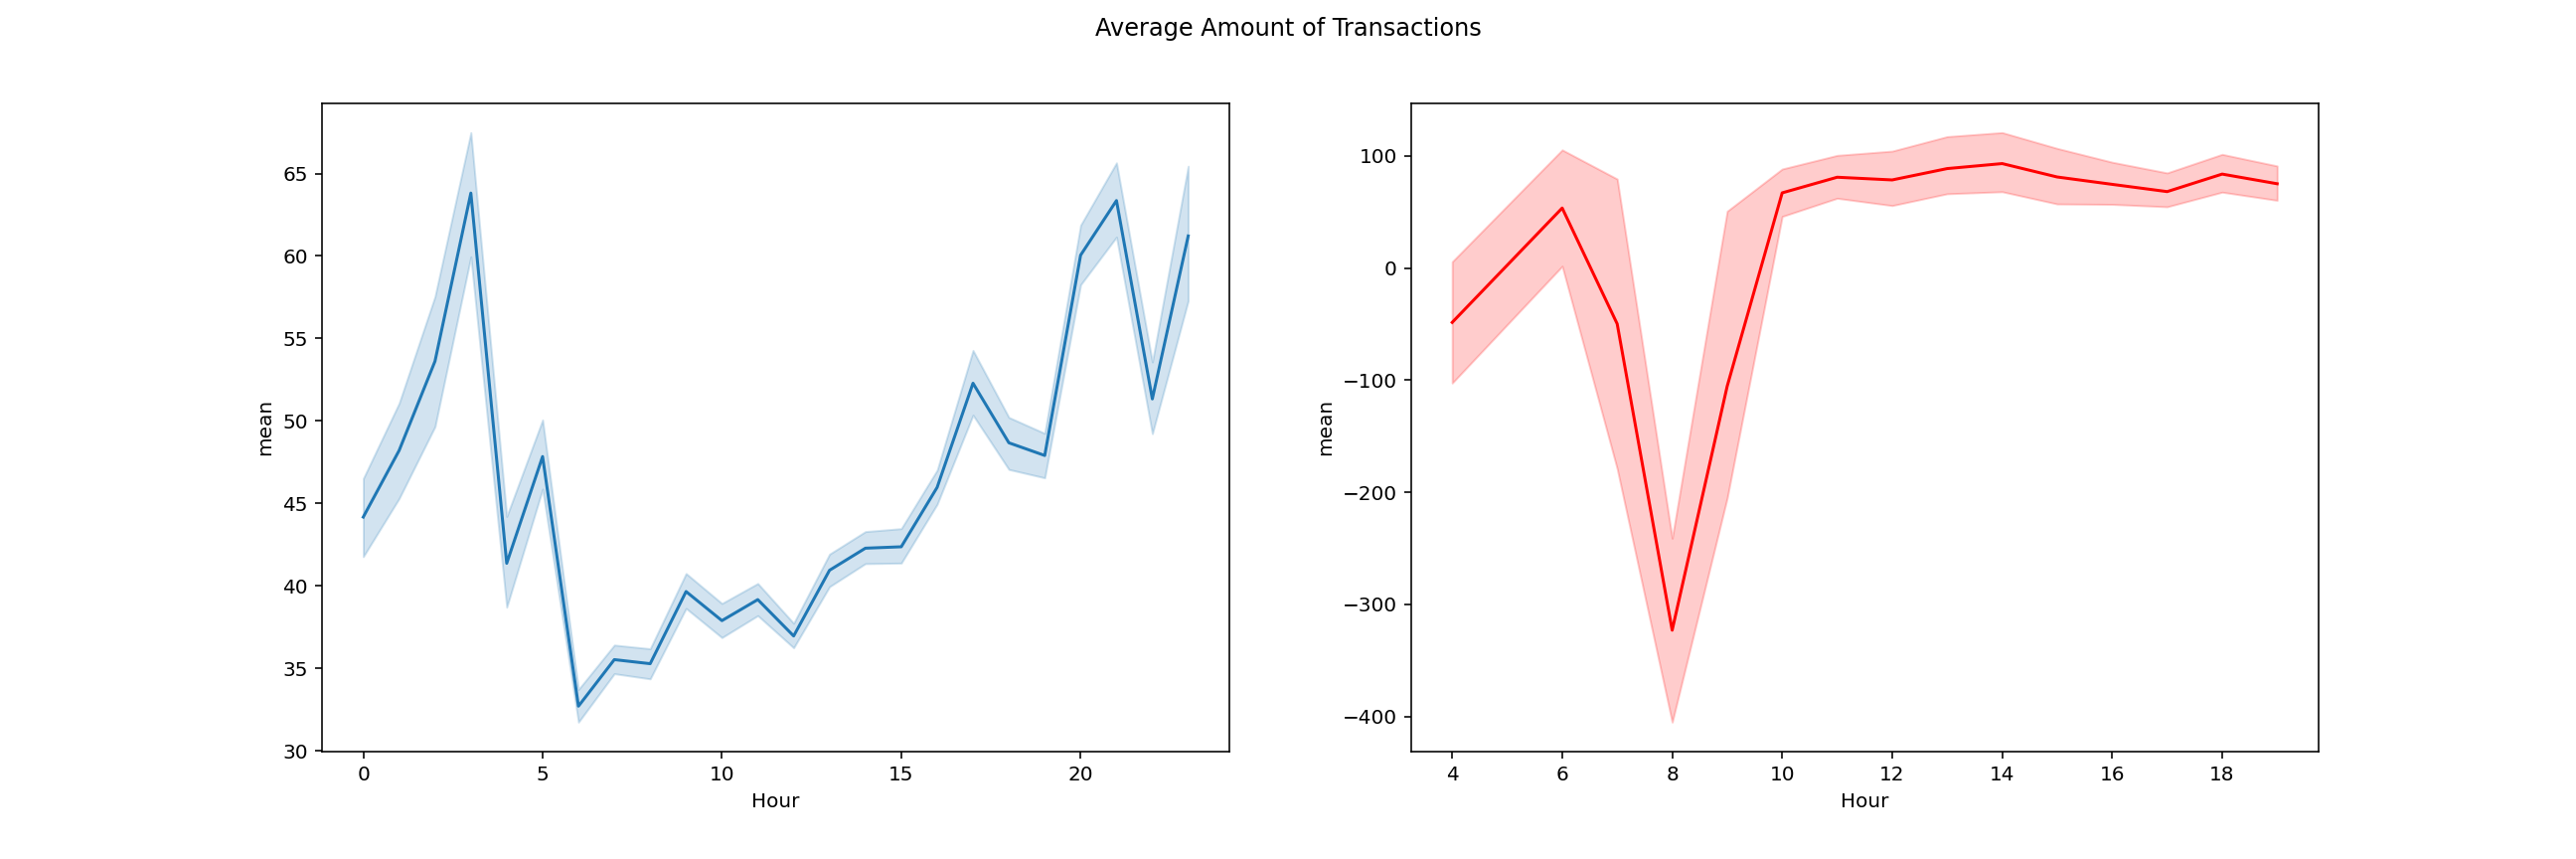
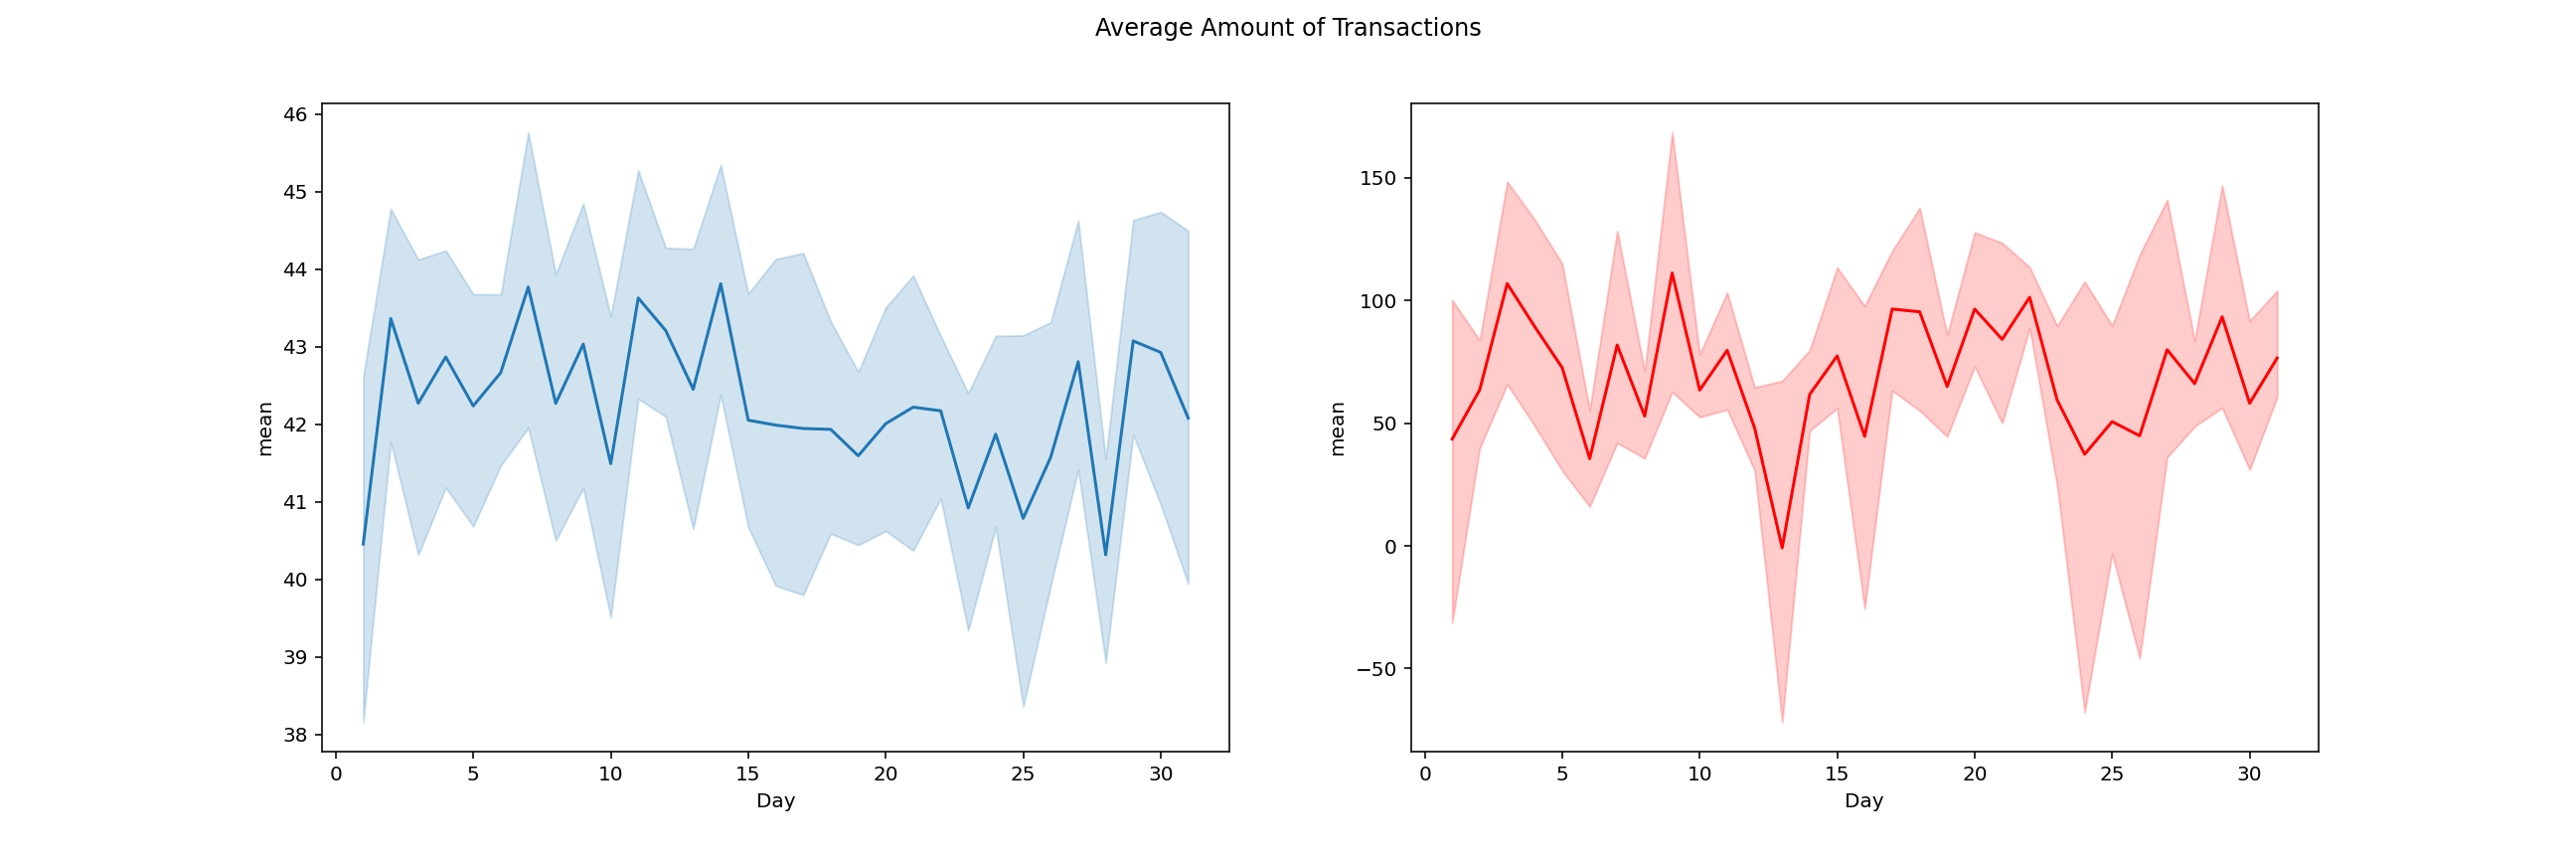
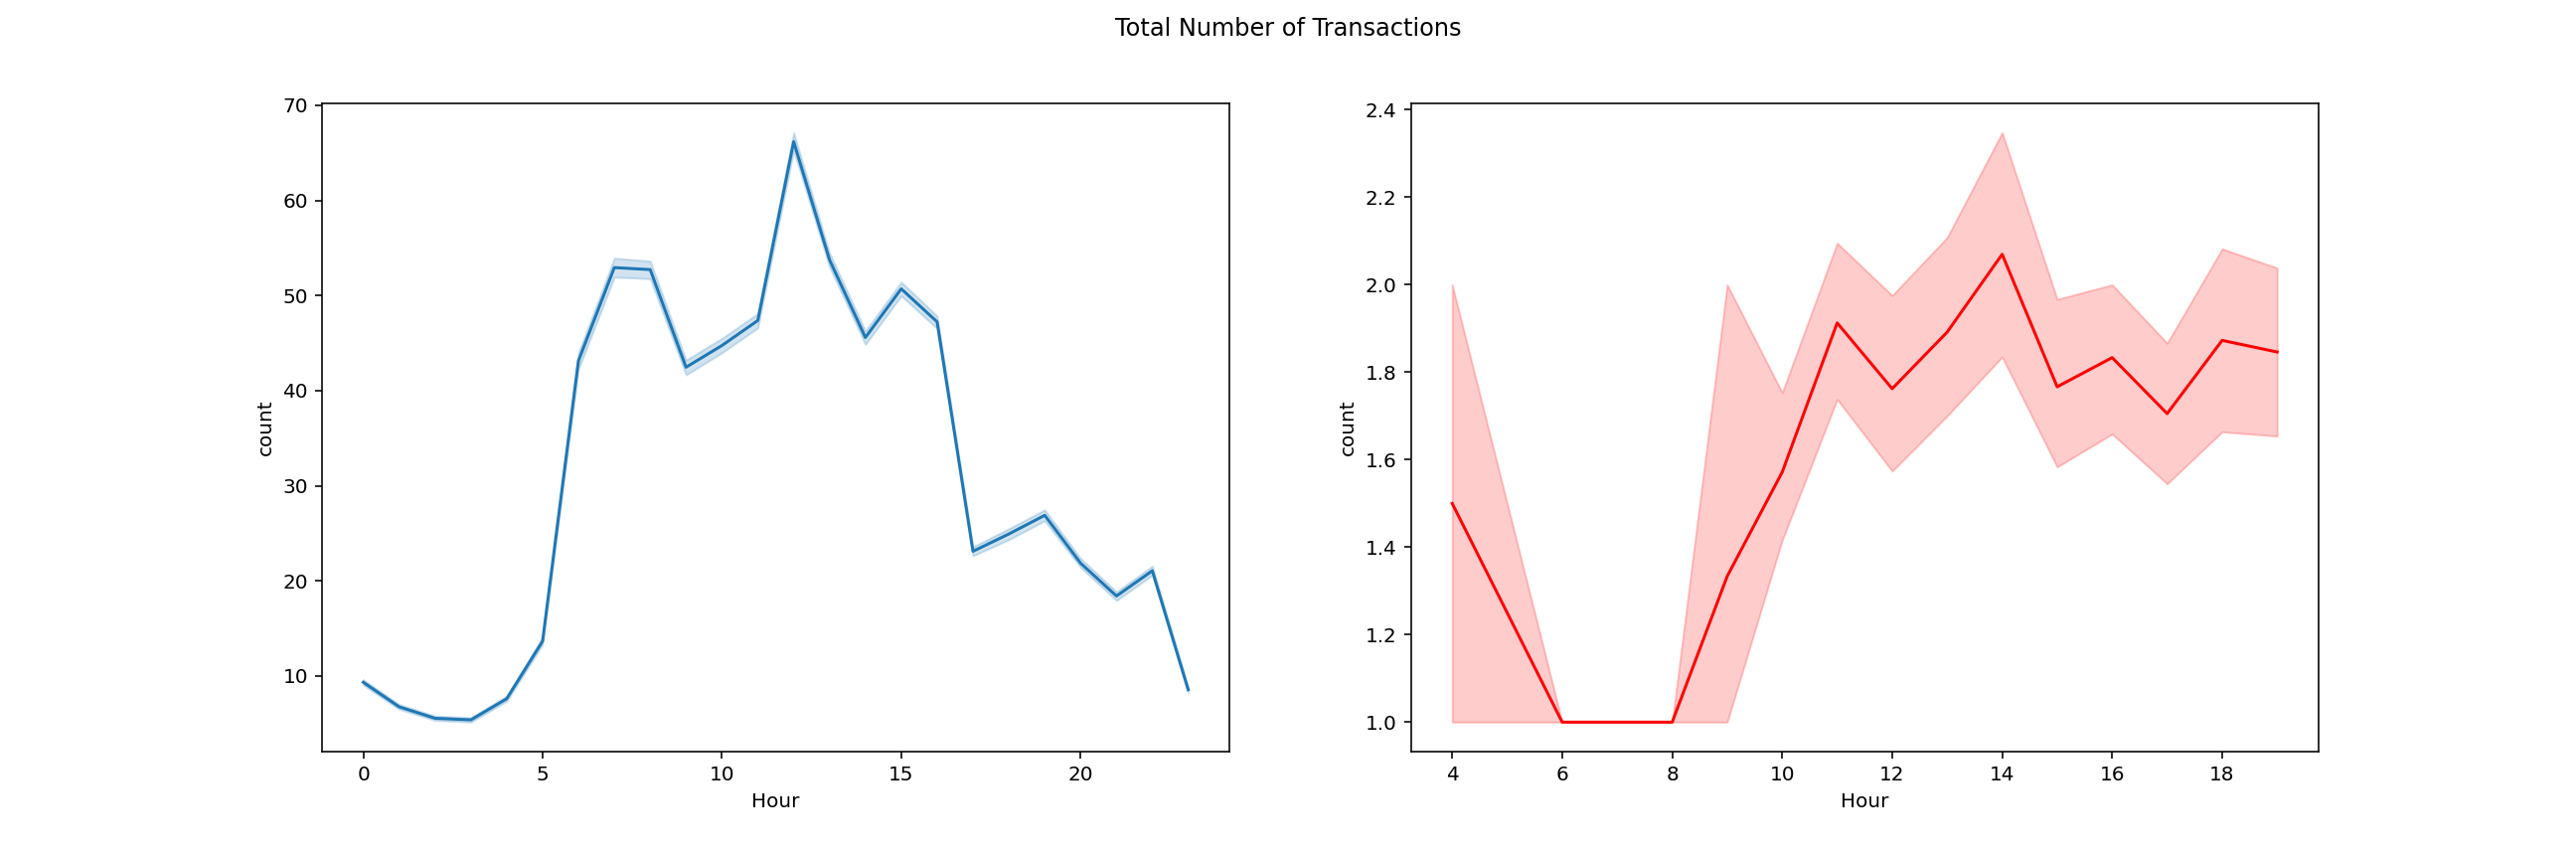
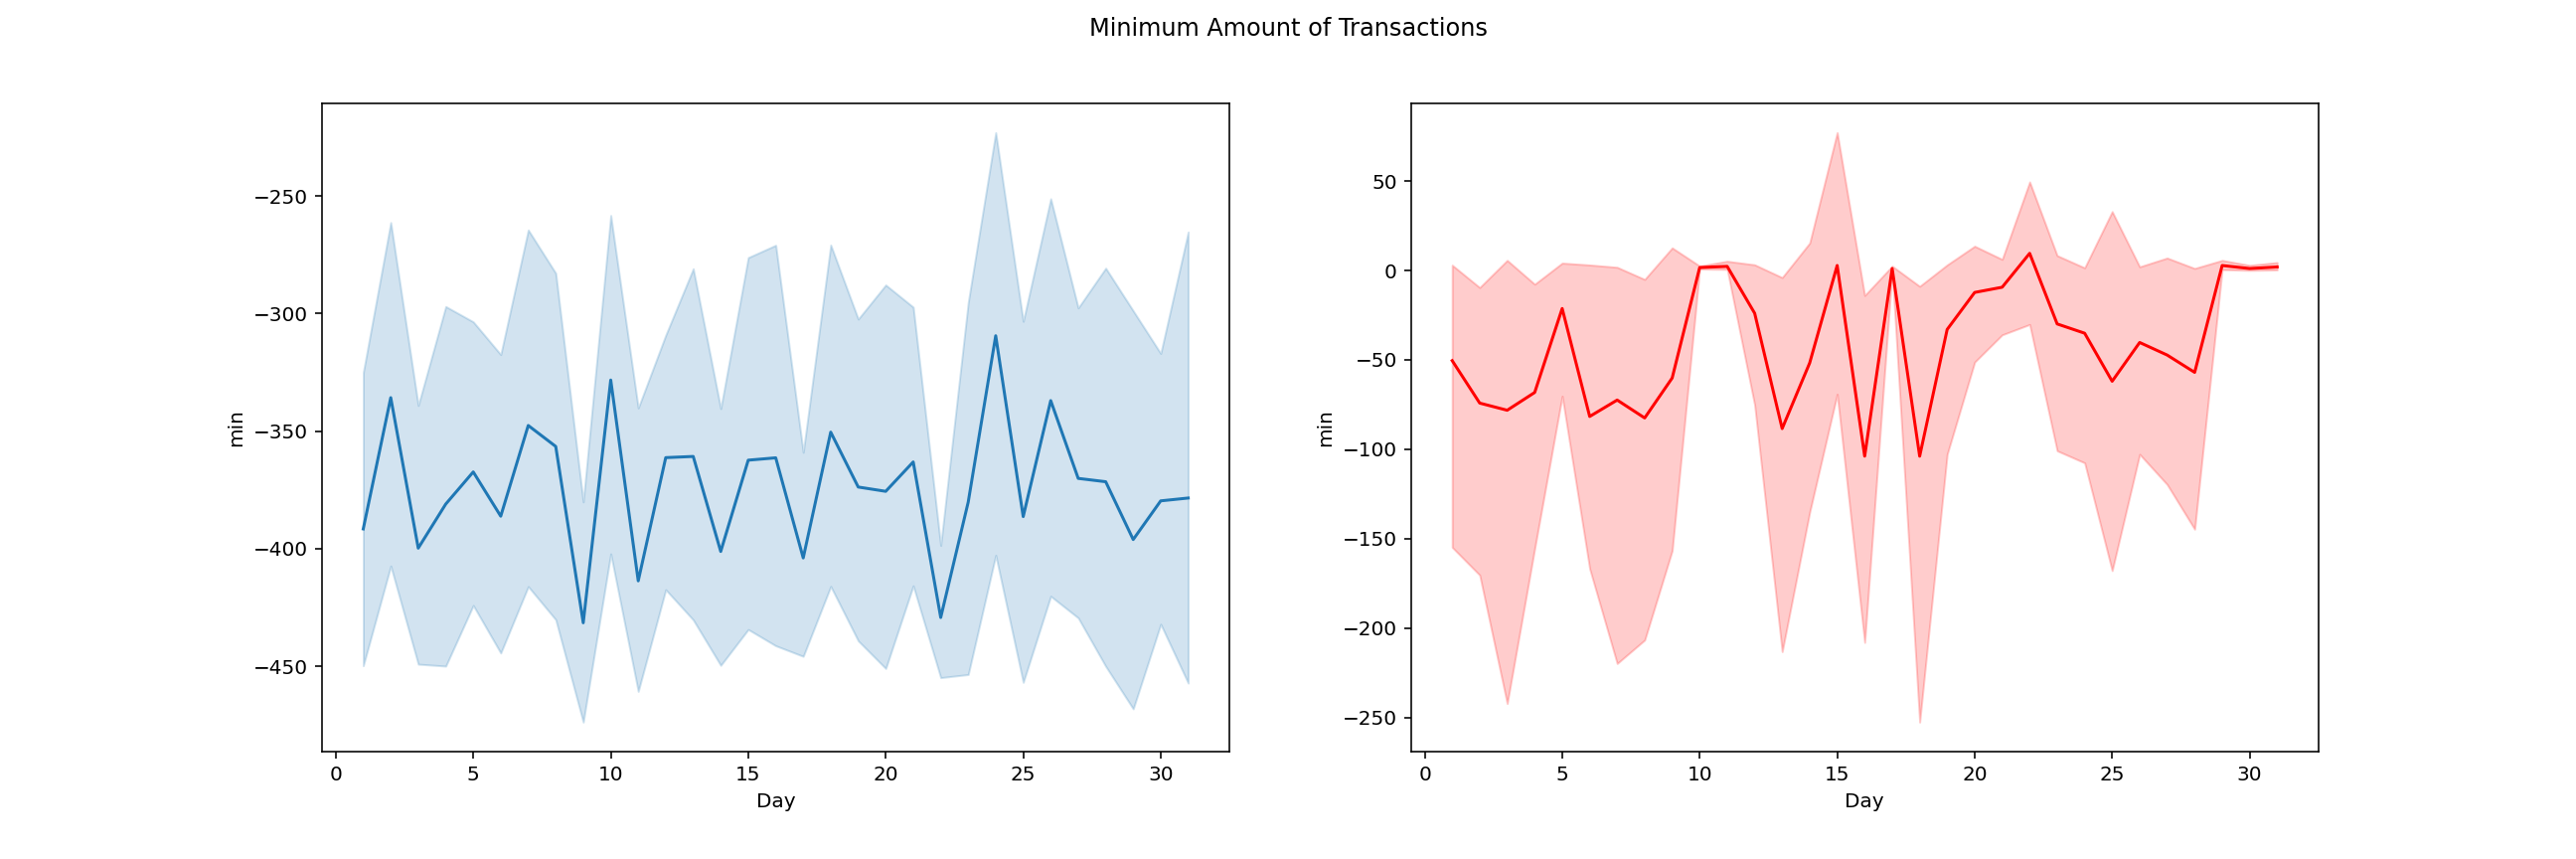
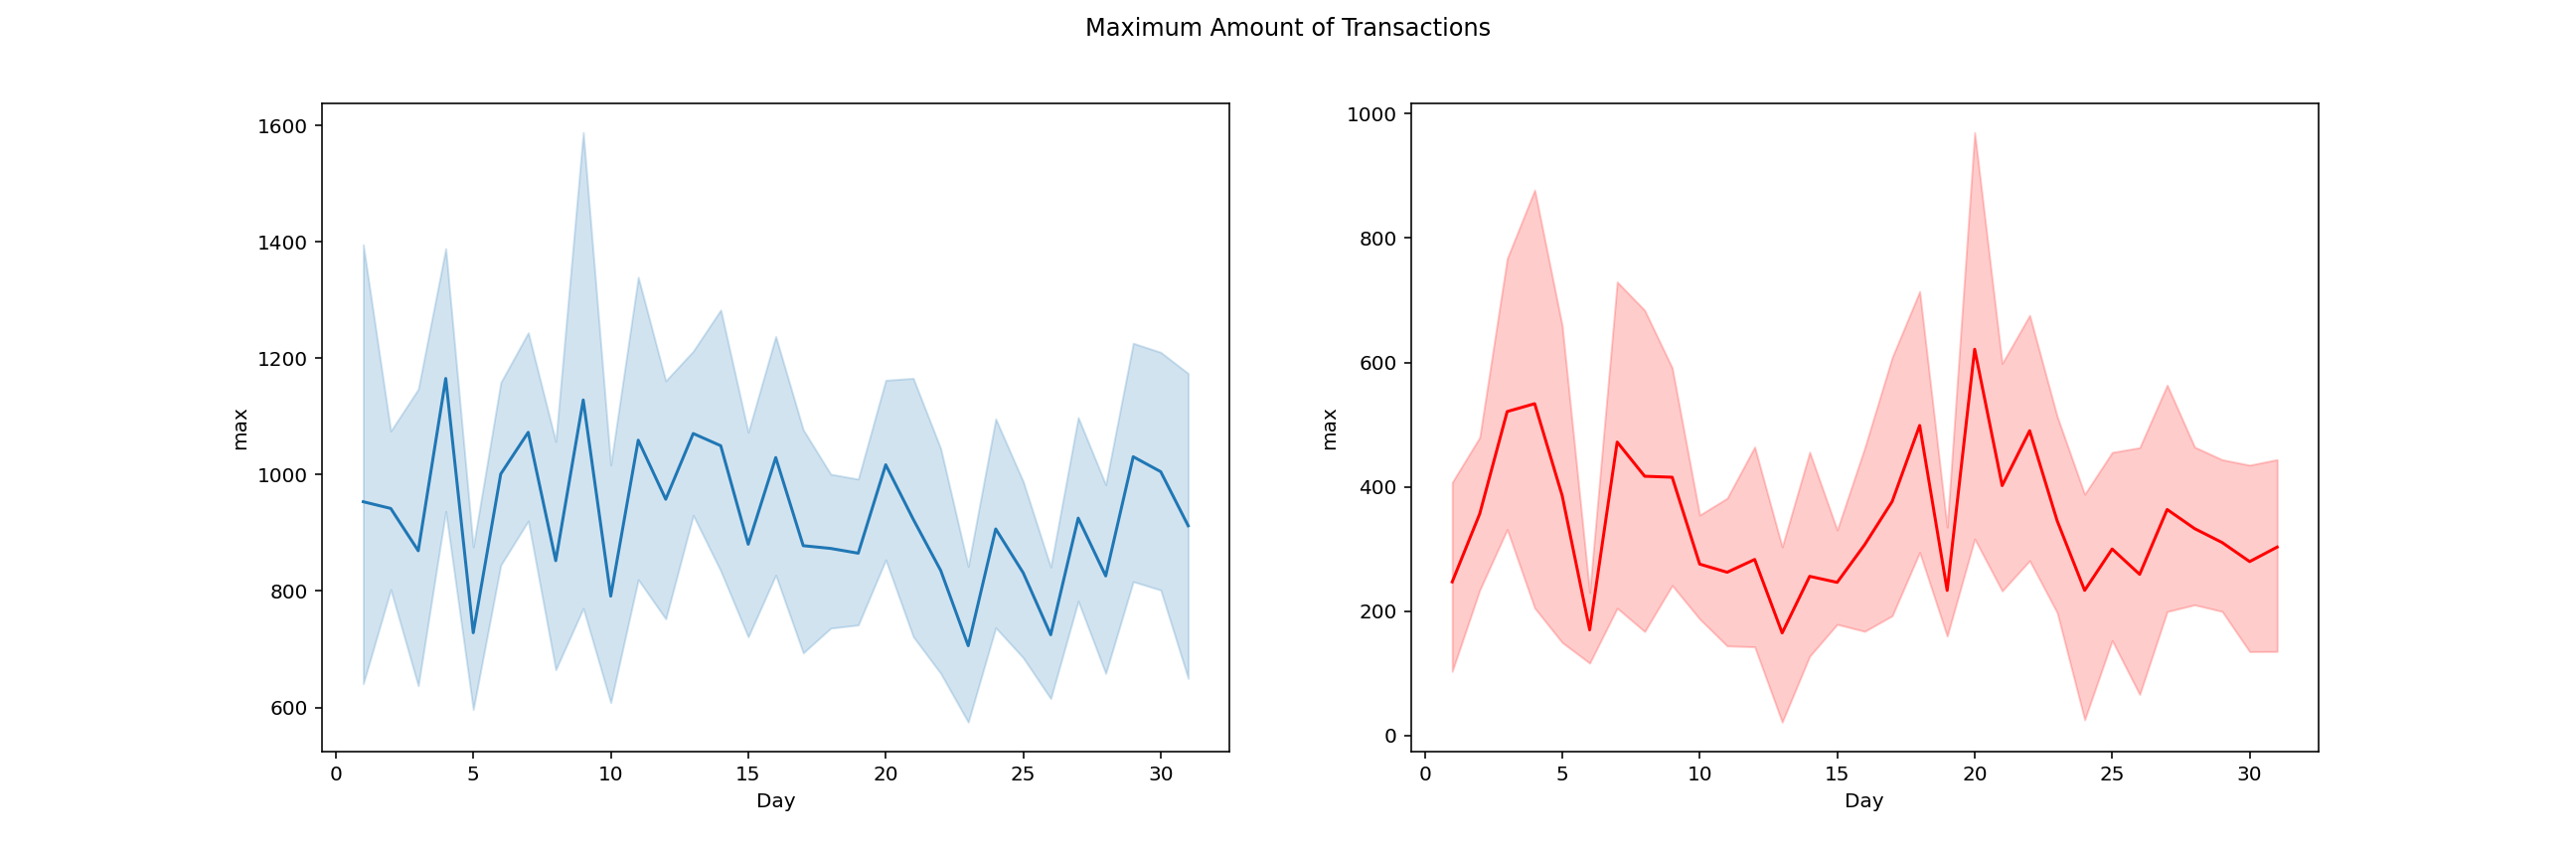

In [325]:
#Combining the different plots above into the tabs for the panel dashboards
tab1 = pn.Column(  
    '### Statistical Analysis of inputs (Daily)',
    fig_amount_daily,
    fig_number_daily,
    fig_mean_daily,
    fig_median_daily,
    fig_min_daily,
    fig_max_daily
)
tab2 = pn.Column(
    '### Statistical Analysis of inputs (Hourly)',
    fig_amount_hourly,
    fig_number_hourly,
    fig_mean_hourly,
    fig_median_hourly,
    fig_min_hourly,
    fig_max_hourly
)

tab3 = pn.Row(
    fig_box
)
#Putting this into panel tabs
tabs = pn.Tabs(
    #("Welcome", welcome_column),
    ("Daily", tab1),
    ("Hourly", tab2),
    ("Box plot", tab3)
)

#creating the panel dashboard
tabs.servable()